# Train set preparation - cleaning

In [308]:
# First data Exploration (values to predict, correlation ..)
import os
import datetime as dt
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline
os.chdir(b"C:\Users\hp\Documents\GitHub\ProjetISA")
df = pd.read_csv('Code +Data/TrainSample.csv',sep=';',decimal=',')
df.head()

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: DeprecationWarning: The Windows bytes API has been deprecated, use Unicode filenames instead


,API,Surf_X,Surf_Y,Date_Drilling,Date_Completion,Date_Production,Lateral_Length (ft),Depth_TVD_PPLS (ft),Erosion_PPLS (ft),Pressure_PPLS (PSI),...,Min_Rate_Slurry (bpm),ShutInPressure_Fil (KPa),ShutInPressure_Initial (KPa),ISIP (KPa),Shot_Density (shots/ft),Shot_Total,Proppant_per_ft (kg/ft),Stage_Spacing (ft),GasCum360,OilCum360
0,661,0.429600,-0.193201,01/06/2013,21/03/2014,08/05/2014,-1.124200,-0.214336,-1.262296,-0.153197,...,0.635528,-0.067825,0.069978,-0.253698,-1.253690,0.181738,0.979100,-0.184434,-0.323593,-0.659768
1,523,-0.082672,-0.539854,31/08/2014,17/02/2015,03/08/2015,1.286521,0.870034,0.717834,0.674376,...,-1.364776,0.835789,1.136126,0.995649,0.667339,-0.560750,1.999634,-1.225036,-0.356343,1.782547
2,703,-0.457415,-0.082104,04/11/2013,08/07/2014,30/07/2014,-0.781945,0.511093,0.592495,-0.937430,...,0.667127,-0.287786,0.979602,-0.386425,-1.253690,0.181738,-0.492791,-0.181300,-1.067145,0.283035
3,473,0.376282,-0.310432,24/11/2011,11/05/2012,13/07/2012,-0.442801,0.025900,-1.093255,0.164815,...,0.033723,-1.034051,-1.342103,-1.546778,-0.293176,-1.303237,-0.295062,2.135885,-0.734454,-0.328650
4,309,-0.113110,-0.111412,20/11/2014,07/04/2015,23/07/2015,0.258511,0.190913,1.229474,-0.347126,...,-0.868364,0.923707,1.470667,0.561383,0.667339,-0.560750,2.034630,-1.226546,-0.271119,0.975603


In [309]:
df.describe()

,API,Surf_X,Surf_Y,Lateral_Length (ft),Depth_TVD_PPLS (ft),Erosion_PPLS (ft),Pressure_PPLS (PSI),TOC_PPLS (%),Vcarb_PPLS,Vsand_PPLS,...,Min_Rate_Slurry (bpm),ShutInPressure_Fil (KPa),ShutInPressure_Initial (KPa),ISIP (KPa),Shot_Density (shots/ft),Shot_Total,Proppant_per_ft (kg/ft),Stage_Spacing (ft),GasCum360,OilCum360
count,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,451.000000,460.000000,460.000000,460.000000,...,362.000000,332.000000,357.000000,361.000000,362.000000,362.000000,362.000000,363.000000,460.000000,460.000000
mean,408.271739,0.048312,-0.020504,-0.038670,-0.020932,-0.044322,0.032553,0.027042,0.009838,-0.018139,...,-0.000074,-0.007804,0.043509,-0.001943,0.053141,-0.007765,-0.020633,0.063128,-0.004878,-0.011122
std,228.391358,0.972776,0.974876,0.982085,0.947728,0.992127,0.983659,0.995567,1.032273,1.026098,...,0.956717,0.973805,1.032365,1.074640,1.009530,0.797089,0.987912,1.047143,1.015833,0.986570
min,1.000000,-2.426259,-2.740075,-2.325205,-2.958958,-2.135948,-3.287442,-2.169983,-3.404962,-2.125431,...,-1.576223,-6.253073,-2.784977,-2.916152,-1.693075,-1.320112,-1.959572,-1.647296,-1.241844,-0.846812
25%,206.750000,-0.377085,-0.631271,-0.723762,-0.675256,-0.854066,-0.596984,-0.593362,-0.294986,-0.718530,...,-0.637123,-0.668154,-0.622318,-0.427222,-1.163446,-0.560750,-0.533204,-0.384367,-0.670713,-0.762137
50%,412.000000,0.149286,-0.034792,-0.394263,-0.008885,-0.031200,0.177588,0.324258,0.245879,-0.190943,...,0.216815,0.079044,0.198764,0.176120,0.667339,0.159425,-0.486552,-0.178793,-0.354850,-0.269251
75%,609.250000,0.511680,0.622794,0.578986,0.612669,0.845490,0.659758,0.753375,0.786744,0.512507,...,0.489761,0.669197,0.788128,0.633616,0.667339,0.181738,0.153346,0.435225,0.443100,0.317948
max,793.000000,2.869421,3.143658,3.480066,3.885516,1.987123,1.862078,1.860650,1.868475,3.326308,...,13.261381,3.052486,2.214658,9.119090,2.588369,3.488558,4.769556,4.610967,5.366269,5.527111


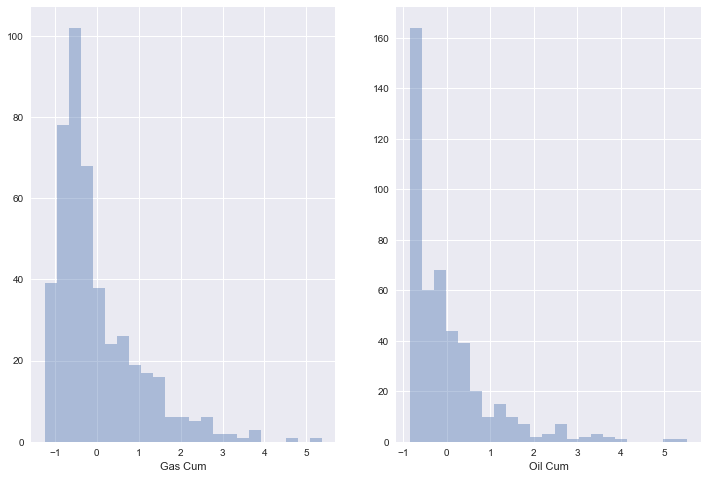

In [310]:
#Visualizing distributions of OilCum and GasCum (values to predict)
plt.figure(figsize=(12,8))
plt.subplot(121)
sns.distplot(df.GasCum360,kde=False)
plt.xlabel('Gas Cum')
plt.subplot(122)
sns.distplot(df.OilCum360,kde=False)
plt.xlabel('Oil Cum')
#plt.axis([10,14,0,180])

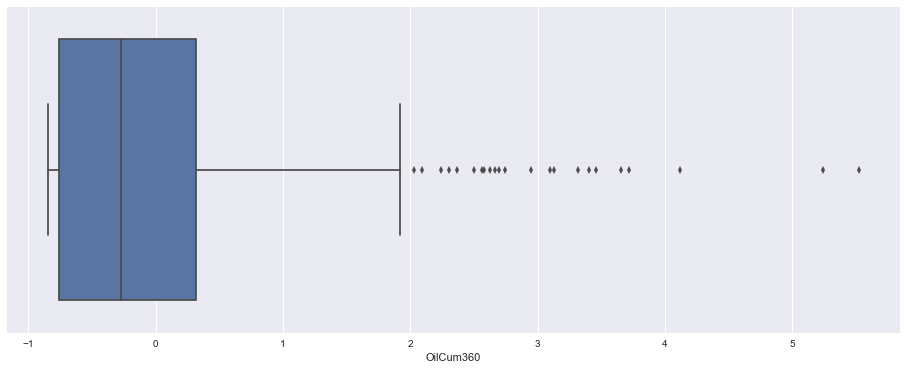

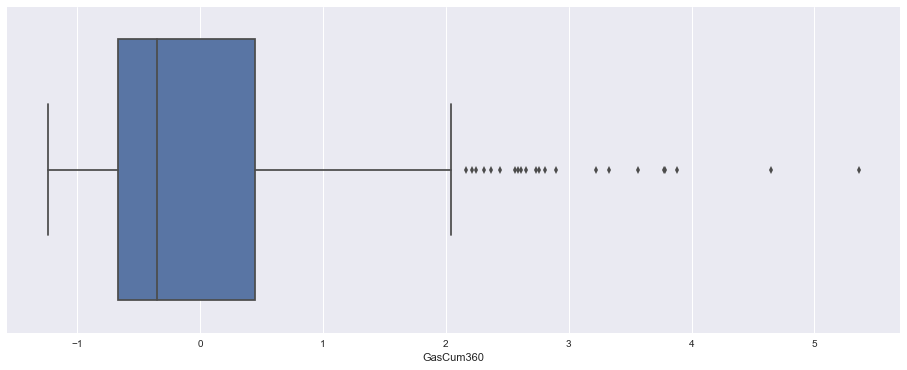

In [311]:
#it is clear that we have outliers for the two variables 
plt.figure(figsize = (16, 6))
sns.boxplot(df['OilCum360'],whis=1.5)
plt.figure(figsize = (16, 6))
sns.boxplot(df['GasCum360'],whis=1.5)

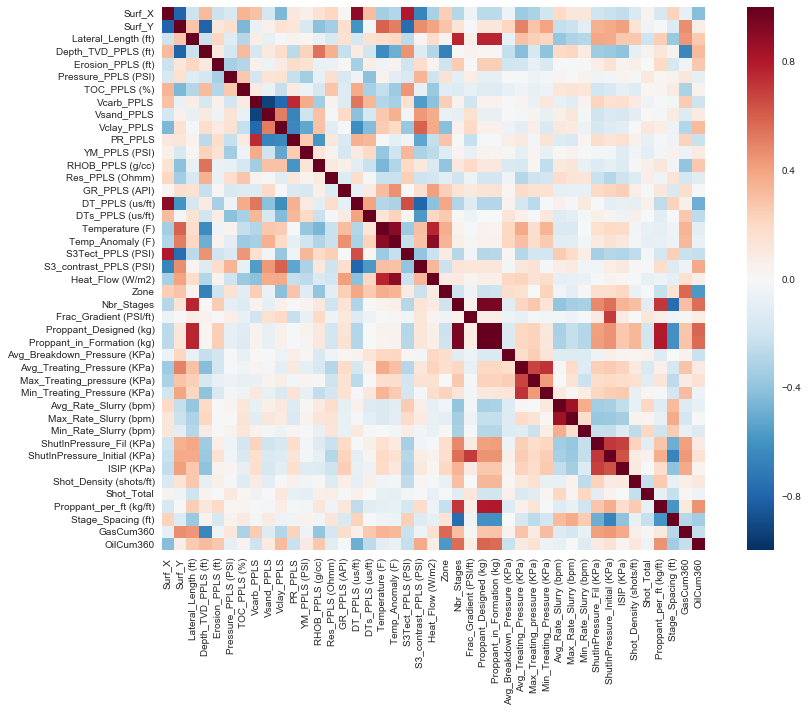

In [312]:
#Pour mieux visualiser les correlations entre les variables, on utilise heatmap. 
corr = df.select_dtypes(include = ['float64', 'int64']).iloc[:,1:].corr()
fig = plt.figure(figsize=(15,10))
sns.set(font_scale=1)  
sns.heatmap(corr, vmax=1, square=True)

In [313]:
correlationG = corr['GasCum360'].sort_values(axis=0,ascending=False).iloc[1:]
correlationO = corr['OilCum360'].sort_values(axis=0,ascending=False).iloc[1:]
print("Pour la variable GasCum :\n",correlationG)

print("Pour la variable GasCum :\n",correlationO)


Pour la variable GasCum :
 Zone                            0.571040
Surf_Y                          0.464759
Lateral_Length (ft)             0.444635
ShutInPressure_Initial (KPa)    0.436298
ShutInPressure_Fil (KPa)        0.413869
ISIP (KPa)                      0.378240
Temperature (F)                 0.337634
Temp_Anomaly (F)                0.327720
Min_Treating_Pressure (KPa)     0.306921
Nbr_Stages                      0.304499
Proppant_in_Formation (kg)      0.283659
Avg_Treating_Pressure (KPa)     0.283176
Proppant_Designed (kg)          0.279918
DTs_PPLS (us/ft)                0.267222
Vcarb_PPLS                      0.253354
PR_PPLS                         0.230320
GR_PPLS (API)                   0.177396
Heat_Flow (W/m2)                0.157747
Pressure_PPLS (PSI)             0.120171
Proppant_per_ft (kg/ft)         0.096563
Max_Treating_pressure (KPa)     0.079698
DT_PPLS (us/ft)                 0.061891
Shot_Density (shots/ft)         0.059898
Avg_Breakdown_Pressure (KPa)  

# Separated data - Outliers and missing values

In [314]:
dfSep=pd.read_csv('./Seperated_Data/data_all_features.csv')
dfSep.head()

,API,Surf_X,Surf_Y,Date_Drilling,Date_Completion,Date_Production,Lateral_Length (ft),Depth_TVD_PPLS (ft),Erosion_PPLS (ft),Pressure_PPLS (PSI),...,Min_Rate_Slurry (bpm),ShutInPressure_Fil (KPa),ShutInPressure_Initial (KPa),ISIP (KPa),Shot_Density (shots/ft),Shot_Total,Proppant_per_ft (kg/ft),Stage_Spacing (ft),GasCum360,OilCum360
0,661,0.429600,-0.193201,01/06/2013,21/03/2014,08/05/2014,-1.124200,-0.214336,-1.262296,-0.153197,...,0.635528,-0.067825,0.069978,-0.253698,-1.253690,0.181738,0.979100,-0.184434,-0.323593,-0.659768
1,523,-0.082672,-0.539854,31/08/2014,17/02/2015,03/08/2015,1.286521,0.870034,0.717834,0.674376,...,-1.364776,0.835789,1.136126,0.995649,0.667339,-0.560750,1.999634,-1.225036,-0.356343,1.782547
2,703,-0.457415,-0.082104,04/11/2013,08/07/2014,30/07/2014,-0.781945,0.511093,0.592495,-0.937430,...,0.667127,-0.287786,0.979602,-0.386425,-1.253690,0.181738,-0.492791,-0.181300,-1.067145,0.283035
3,473,0.376282,-0.310432,24/11/2011,11/05/2012,13/07/2012,-0.442801,0.025900,-1.093255,0.164815,...,0.033723,-1.034051,-1.342103,-1.546778,-0.293176,-1.303237,-0.295062,2.135885,-0.734454,-0.328650
4,309,-0.113110,-0.111412,20/11/2014,07/04/2015,23/07/2015,0.258511,0.190913,1.229474,-0.347126,...,-0.868364,0.923707,1.470667,0.561383,0.667339,-0.560750,2.034630,-1.226546,-0.271119,0.975603


In [315]:
dfSep.describe()

,API,Surf_X,Surf_Y,Lateral_Length (ft),Depth_TVD_PPLS (ft),Erosion_PPLS (ft),Pressure_PPLS (PSI),TOC_PPLS (%),Vcarb_PPLS,Vsand_PPLS,...,Min_Rate_Slurry (bpm),ShutInPressure_Fil (KPa),ShutInPressure_Initial (KPa),ISIP (KPa),Shot_Density (shots/ft),Shot_Total,Proppant_per_ft (kg/ft),Stage_Spacing (ft),GasCum360,OilCum360
count,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,361.000000,363.000000,363.000000,363.000000,...,362.000000,332.000000,357.000000,361.000000,362.000000,362.000000,362.000000,363.000000,363.000000,363.000000
mean,412.517906,0.341779,-0.290007,-0.087250,0.077515,-0.206906,0.081390,0.265943,0.229862,-0.200148,...,-0.000074,-0.007804,0.043509,-0.001943,0.053141,-0.007765,-0.020633,0.063128,-0.047732,-0.104826
std,230.971062,0.613959,0.730973,1.025575,0.871635,0.977851,0.975618,0.896139,0.894158,0.991819,...,0.956717,0.973805,1.032365,1.074640,1.009530,0.797089,0.987912,1.047143,0.878103,0.898170
min,1.000000,-2.190075,-2.740075,-2.325205,-2.676638,-2.135948,-3.287442,-2.169983,-3.404962,-2.125431,...,-1.576223,-6.253073,-2.784977,-2.916152,-1.693075,-1.320112,-1.959572,-1.647296,-1.230141,-0.846812
25%,210.500000,-0.078105,-0.740311,-0.781012,-0.618171,-0.950565,-0.596165,-0.089533,-0.159770,-1.070255,...,-0.637123,-0.668154,-0.622318,-0.427222,-1.163446,-0.560750,-0.533204,-0.384367,-0.662907,-0.780778
50%,410.000000,0.268618,-0.187632,-0.468937,0.109385,-0.279313,0.222740,0.527322,0.381095,-0.190943,...,0.216815,0.079044,0.198764,0.176120,0.667339,0.159425,-0.486552,-0.178793,-0.323593,-0.343815
75%,623.500000,0.674888,0.172024,0.538227,0.632283,0.569349,0.686254,0.845329,0.786744,0.336645,...,0.489761,0.669197,0.788128,0.633616,0.667339,0.181738,0.153346,0.435225,0.449358,0.157602
max,793.000000,2.439690,1.707435,3.480066,3.885516,1.987123,1.862078,1.860650,1.868475,3.326308,...,13.261381,3.052486,2.214658,9.119090,2.588369,3.488558,4.769556,4.610967,3.560147,5.242229


In [316]:
#Variables with Missing values to estimate:
mv=dfSep.isnull().sum()
print(mv)

API                              0
Surf_X                           0
Surf_Y                           0
Date_Drilling                    1
Date_Completion                  1
Date_Production                  0
Lateral_Length (ft)              0
Depth_TVD_PPLS (ft)              0
Erosion_PPLS (ft)                0
Pressure_PPLS (PSI)              2
TOC_PPLS (%)                     0
Vcarb_PPLS                       0
Vsand_PPLS                       0
Vclay_PPLS                       0
PR_PPLS                          0
YM_PPLS (PSI)                    0
RHOB_PPLS (g/cc)                 0
Res_PPLS (Ohmm)                  0
GR_PPLS (API)                    0
DT_PPLS (us/ft)                  0
DTs_PPLS (us/ft)                 0
Temperature (F)                  0
Temp_Anomaly (F)                 0
S3Tect_PPLS (PSI)                0
S3_contrast_PPLS (PSI)           0
Heat_Flow (W/m2)                 0
Zone                             0
Nbr_Stages                       0
Frac_Gradient (PSI/f

I'll take the two dates to impute the m-values / incude a new variable deltaT between the two dates
Attributes :
-Pressure_PPLS (PSI)
-Proppant_in_Formation (kg)
-Avg_Breakdown_Pressure (KPa)
-Max_Treating_pressure (KPa)
-Min_Treating_Pressure (KPa)
-Max_Rate_Slurry (bpm) 
-Min_Rate_Slurry (bpm)

# Date_Processing

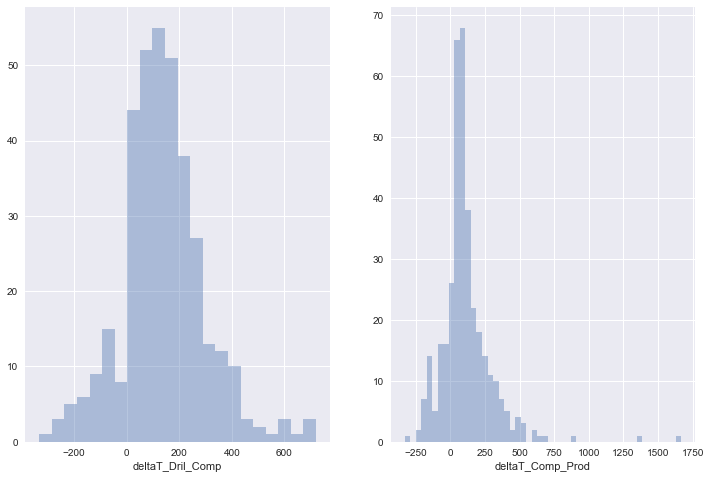

In [317]:
#Convert date variables to date time
#Missing dates
pd.to_datetime(dfSep["Date_Drilling"])
dfSep["Date_Drilling"]=pd.to_datetime(dfSep["Date_Drilling"])
dfSep["Date_Completion"]=pd.to_datetime(dfSep["Date_Completion"])
dfSep["Date_Production"]=pd.to_datetime(dfSep["Date_Production"])
dfSep["deltaT_Dril_Comp"]=(dfSep["Date_Completion"]-dfSep["Date_Drilling"]).dt.days
dfSep["deltaT_Comp_Prod"]=(dfSep["Date_Production"]-dfSep["Date_Completion"]).dt.days
###
cols = dfSep.columns.tolist()
dfSep=dfSep[cols[:6]+[cols[-2]]+[cols[-1]]+cols[6:-2]]

#Visualizing distributions of deltaT_Dril_Comp and GasCumdeltaT_Comp_Prod (values to predict)
plt.figure(figsize=(12,8))
plt.subplot(121)
sns.distplot(dfSep.deltaT_Dril_Comp.dropna(),kde=False)
plt.xlabel("deltaT_Dril_Comp")
plt.subplot(122)
sns.distplot(dfSep.deltaT_Comp_Prod.dropna(),kde=False)
plt.xlabel("deltaT_Comp_Prod")




In [318]:
dfSep.iloc[:,3:8][dfSep.iloc[:,3:8]["Date_Production"].map(lambda x: x.year)==2016]

,Date_Drilling,Date_Completion,Date_Production,deltaT_Dril_Comp,deltaT_Comp_Prod
115,2012-02-04,2012-05-16,2016-12-08,102.0,1667.0
144,2014-02-07,2014-12-22,2016-04-13,318.0,478.0
175,NaT,NaT,2016-04-14,NaN,NaN
195,2014-12-24,2016-09-01,2016-04-22,617.0,-132.0
212,2014-06-15,2016-06-04,2016-06-04,720.0,0.0
247,2014-10-12,2016-09-01,2016-04-21,690.0,-133.0
310,2013-03-09,2013-09-12,2016-03-05,187.0,905.0
311,2011-11-30,2012-06-26,2016-04-04,209.0,1378.0
314,2014-11-22,2016-01-17,2016-04-26,421.0,100.0
330,2014-12-04,2014-09-22,2016-06-02,-73.0,619.0


[(-332.0, 1.0),
 (-292.02, 0.0),
 (-252.04000000000002, 2.0),
 (-212.06, 7.0),
 (-172.08000000000004, 14.0),
 (-132.10000000000002, 5.0),
 (-92.12, 16.0),
 (-52.14000000000004, 16.0),
 (-12.160000000000025, 26.0),
 (27.819999999999993, 66.0),
 (67.79999999999995, 68.0),
 (107.77999999999997, 38.0),
 (147.76, 22.0),
 (187.74, 18.0),
 (227.7199999999999, 14.0),
 (267.69999999999993, 11.0),
 (307.67999999999995, 10.0),
 (347.65999999999997, 7.0),
 (387.64, 5.0),
 (427.6199999999999, 2.0),
 (467.5999999999999, 4.0),
 (507.5799999999999, 3.0),
 (547.56, 0.0),
 (587.54, 2.0),
 (627.52, 1.0),
 (667.5, 1.0),
 (707.48, 0.0),
 (747.4599999999998, 0.0),
 (787.4399999999998, 0.0),
 (827.4199999999998, 0.0),
 (867.3999999999999, 1.0),
 (907.3799999999999, 0.0),
 (947.3599999999999, 0.0),
 (987.3399999999999, 0.0),
 (1027.32, 0.0),
 (1067.3, 0.0),
 (1107.28, 0.0),
 (1147.2600000000002, 0.0),
 (1187.2399999999998, 0.0),
 (1227.2199999999998, 0.0),
 (1267.1999999999998, 0.0),
 (1307.1799999999998, 0.0

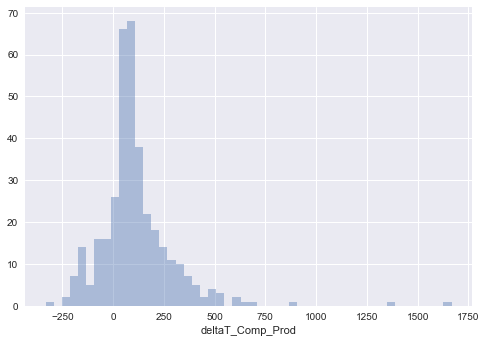

In [319]:
#Pour la Date_Comp
plt.figure()
[(h.get_x(),h.get_height()) for h in sns.distplot(dfSep.deltaT_Comp_Prod.dropna(),kde=False).patches]
#On prend donc le mean des 2 valeurs les plus fréquents : 27.8 et 67.8 = 48 Jrs


[(-332.0, 1.0),
 (-284.18181818181813, 3.0),
 (-236.36363636363637, 5.0),
 (-188.54545454545453, 6.0),
 (-140.72727272727272, 9.0),
 (-92.9090909090909, 15.0),
 (-45.090909090909065, 8.0),
 (2.727272727272748, 44.0),
 (50.54545454545456, 52.0),
 (98.36363636363637, 55.0),
 (146.1818181818182, 51.0),
 (194.0, 38.0),
 (241.81818181818187, 27.0),
 (289.6363636363636, 13.0),
 (337.4545454545455, 12.0),
 (385.27272727272725, 10.0),
 (433.0909090909091, 3.0),
 (480.909090909091, 2.0),
 (528.7272727272727, 1.0),
 (576.5454545454546, 3.0),
 (624.3636363636363, 1.0),
 (672.1818181818182, 3.0)]

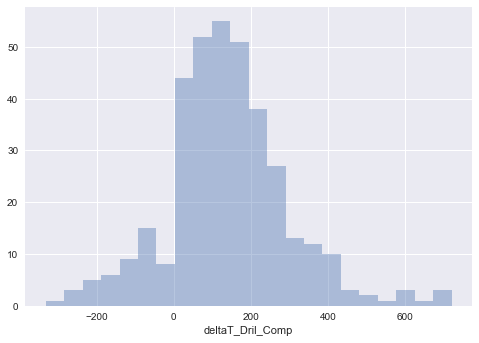

In [320]:
plt.figure()
[(h.get_x(),h.get_height()) for h in sns.distplot(dfSep.deltaT_Dril_Comp.dropna(),kde=False).patches]
#On prend donc le mean de la distribution: 98 Jrs

In [321]:
#Filling the missing 2 dates:
dfSep.iloc[175,[6,7]]=[98,48]
dfSep.iloc[175,4]=dfSep.iloc[175,5]-dt.timedelta(days=dfSep.iloc[175,7])
dfSep.iloc[175,3]=dfSep.iloc[175,4]-dt.timedelta(days=dfSep.iloc[175,6])

In [322]:
dfTest = pd.read_csv('Code +Data/TestSample.csv',sep=';',decimal=',')
dfTest.head()

,API,Surf_X,Surf_Y,Date_Drilling,Date_Completion,Date_Production,Lateral_Length (ft),Depth_TVD_PPLS (ft),Erosion_PPLS (ft),Pressure_PPLS (PSI),...,Avg_Rate_Slurry (bpm),Max_Rate_Slurry (bpm),Min_Rate_Slurry (bpm),ShutInPressure_Fil (KPa),ShutInPressure_Initial (KPa),ISIP (KPa),Shot_Density (shots/ft),Shot_Total,Proppant_per_ft (kg/ft),Stage_Spacing (ft)
0,633,0.201275,-0.577329,23/06/2013,26/10/2013,10/01/2014,-0.694826,0.641631,-0.356227,1.410748,...,0.908861,0.395627,0.667402,NaN,-0.740473,0.131374,0.187082,2.409201,0.160140,-0.710739
1,587,0.222609,0.670307,02/06/2012,03/07/2012,05/08/2013,-0.479516,-1.377997,-1.812483,1.605136,...,-0.922311,0.896792,0.285738,-0.919600,-1.103957,-1.282464,0.667339,-0.560750,-1.149666,2.085649
2,264,0.022105,0.404387,19/05/2013,24/07/2013,06/10/2013,0.310782,-0.775745,0.243462,-0.136014,...,0.148860,-0.094971,0.459046,0.614126,1.029028,1.103339,-0.773433,0.924226,-0.585869,-0.137427
3,680,0.384359,0.372793,18/08/2012,19/12/2012,12/06/2013,-0.624508,-1.082974,-1.922374,1.443630,...,0.970521,1.132279,0.332100,-0.782232,0.450368,-0.136076,0.667339,-0.560750,0.595622,1.887260
4,443,-0.138513,0.408803,11/09/2013,29/03/2014,11/05/2014,0.338785,-0.616106,0.556826,-1.011425,...,0.786056,0.985914,0.323490,NaN,0.743256,0.835687,-1.253690,0.181738,0.151633,-0.216512


# OTHER VARIABLES

In [323]:
#Extract outliers and replacing method
def outliers(df,column,factor_iqr):
    #quartiles
    Q1=np.percentile(df.dropna()[column],25)
    Q3=np.percentile(df.dropna()[column],75)
    iqr=Q3-Q1    
    #identify outliers
    mean=np.mean(df[column])
    index=np.logical_or(df[column]< Q1 - factor_iqr*iqr, df[column]> Q3 + factor_iqr*iqr)
    outliers=df[index]
    return outliers
def replace_by_mean(df,column,outliers):
    m=np.mean(dfSep[column])
    df.loc[outliers.index,column]=m
    
    
    

# Lateral_Length (ft)

In [324]:
#MV
dfSep["Lateral_Length (ft)"].isnull().sum()

0

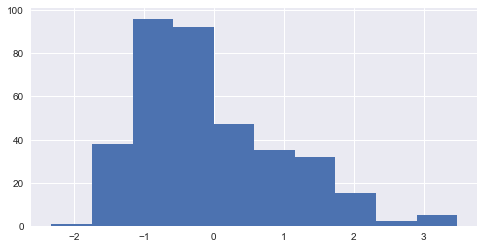

In [325]:
# Check distribution of Lateral_Length:
plt.rcParams['figure.figsize'] = (8.0,4.0)
(dfSep.iloc[:,8]).hist()

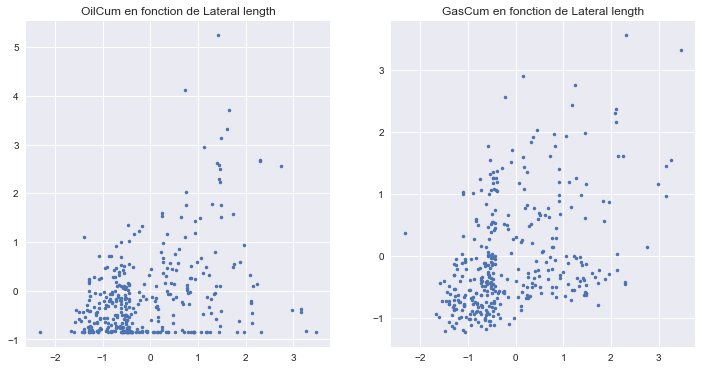

In [326]:
f, (ax1, ax2) = plt.subplots(1,2,figsize=(12,6))
ax1.plot(dfSep["Lateral_Length (ft)"], dfSep.OilCum360,'.')
ax1.set_title("OilCum en fonction de Lateral length")
ax2.plot(dfSep["Lateral_Length (ft)"], dfSep.GasCum360,'.')
ax2.set_title("GasCum en fonction de Lateral length")

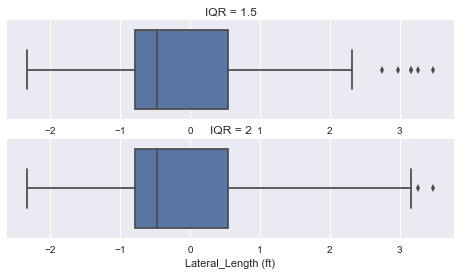

In [327]:
plt.figure(figsize = (16, 6))
f, (ax1, ax2) = plt.subplots(2)
sns.boxplot(dfSep["Lateral_Length (ft)"],whis=1.5,ax=ax1)
ax1.set_title('IQR = 1.5')
sns.boxplot(dfSep["Lateral_Length (ft)"],whis=2,ax=ax2)
ax2.set_title('IQR = 2')

In [328]:
outliers(dfSep,"Lateral_Length (ft)",2)

,API,Surf_X,Surf_Y,Date_Drilling,Date_Completion,Date_Production,deltaT_Dril_Comp,deltaT_Comp_Prod,Lateral_Length (ft),Depth_TVD_PPLS (ft),...,Min_Rate_Slurry (bpm),ShutInPressure_Fil (KPa),ShutInPressure_Initial (KPa),ISIP (KPa),Shot_Density (shots/ft),Shot_Total,Proppant_per_ft (kg/ft),Stage_Spacing (ft),GasCum360,OilCum360
143,251,1.463084,-1.077185,2014-01-26,2014-06-23,2014-08-13,148.0,51.0,3.259778,0.626382,...,-0.483505,-0.448070,-0.353309,0.055775,1.627854,0.181738,-0.500840,-0.188260,1.553784,-0.834806
229,370,1.023428,-0.157719,2014-03-07,2014-09-29,2014-12-17,206.0,79.0,3.480066,-0.717014,...,0.135020,1.626414,1.183389,0.912286,0.667339,-0.560750,-0.519329,-0.171872,3.323647,-0.846812


# Depth_TVD_PPLS (ft)

In [329]:
#MV
dfSep["Depth_TVD_PPLS (ft)"].isnull().sum()

0

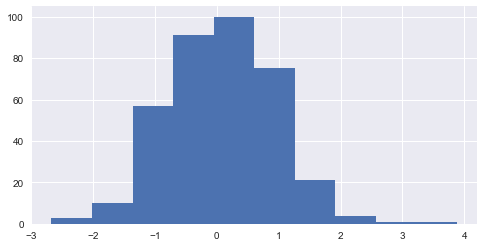

In [330]:
# Check distribution of Lateral_Length:
plt.rcParams['figure.figsize'] = (8.0,4.0)
(dfSep["Depth_TVD_PPLS (ft)"]).hist()

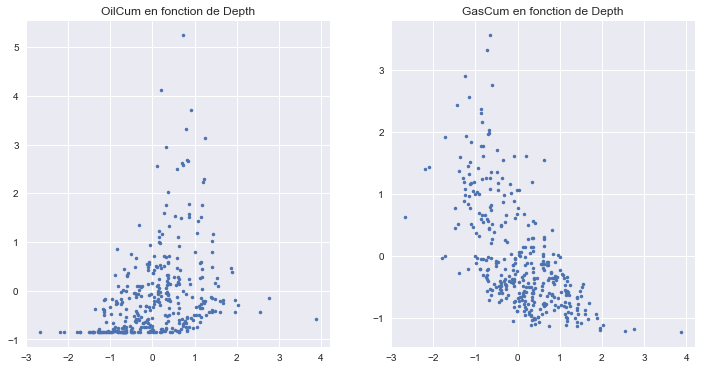

In [331]:
f, (ax1, ax2) = plt.subplots(1,2,figsize=(12,6))
ax1.plot(dfSep["Depth_TVD_PPLS (ft)"], dfSep.OilCum360,'.')
ax1.set_title("OilCum en fonction de Depth")
ax2.plot(dfSep["Depth_TVD_PPLS (ft)"], dfSep.GasCum360,'.')
ax2.set_title("GasCum en fonction de Depth")

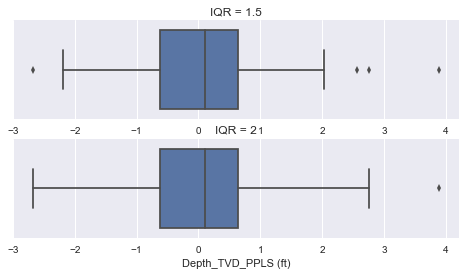

In [332]:
plt.figure(figsize = (16, 6))
f, (ax1, ax2) = plt.subplots(2)
sns.boxplot(dfSep["Depth_TVD_PPLS (ft)"],whis=1.5,ax=ax1)
ax1.set_title('IQR = 1.5')
sns.boxplot(dfSep["Depth_TVD_PPLS (ft)"],whis=2,ax=ax2)
ax2.set_title('IQR = 2')

In [333]:
o1=outliers(dfSep,"Depth_TVD_PPLS (ft)",2)
o1

,API,Surf_X,Surf_Y,Date_Drilling,Date_Completion,Date_Production,deltaT_Dril_Comp,deltaT_Comp_Prod,Lateral_Length (ft),Depth_TVD_PPLS (ft),...,Min_Rate_Slurry (bpm),ShutInPressure_Fil (KPa),ShutInPressure_Initial (KPa),ISIP (KPa),Shot_Density (shots/ft),Shot_Total,Proppant_per_ft (kg/ft),Stage_Spacing (ft),GasCum360,OilCum360
192,502,-0.323839,-2.540938,2011-11-11,2012-07-08,2012-02-05,240.0,-154.0,-1.06695,3.885516,...,-0.218833,NaN,-2.435179,-2.384075,-0.457835,-0.730461,-0.42203,0.938276,-1.230141,-0.572565


In [334]:
replace_by_mean(dfSep,"Depth_TVD_PPLS (ft)",o1)

# Erosion_PPLS (ft)

In [335]:
#MV
dfSep["Erosion_PPLS (ft)"].isnull().sum()

0

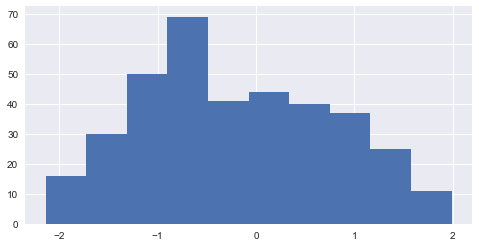

In [336]:
# Check distribution of Lateral_Length:
plt.rcParams['figure.figsize'] = (8.0,4.0)
(dfSep["Erosion_PPLS (ft)"]).hist()

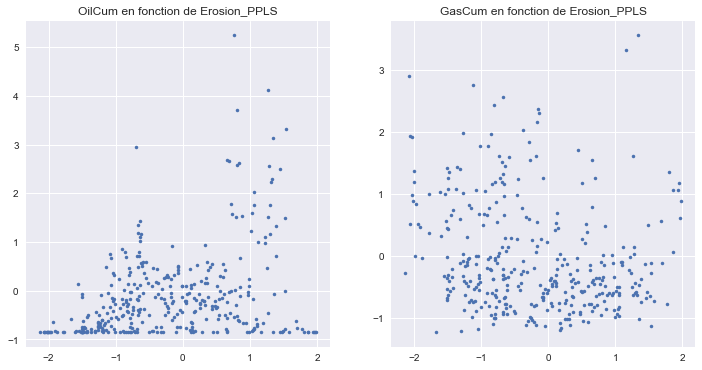

In [337]:
f, (ax1, ax2) = plt.subplots(1,2,figsize=(12,6))
ax1.plot(dfSep["Erosion_PPLS (ft)"], dfSep.OilCum360,'.')
ax1.set_title("OilCum en fonction de Erosion_PPLS")
ax2.plot(dfSep["Erosion_PPLS (ft)"], dfSep.GasCum360,'.')
ax2.set_title("GasCum en fonction de Erosion_PPLS")

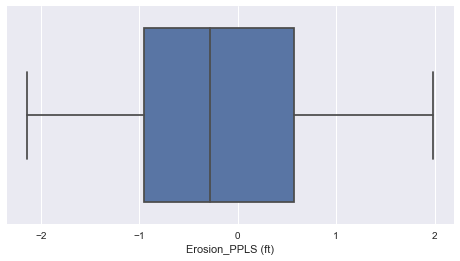

In [338]:
sns.boxplot(dfSep["Erosion_PPLS (ft)"],whis=1.5)

No outliers & no clear dependence between this variable and oil/gas

# Zone

Taking in consideration Andi s analysis about the zone Attribute, It s a categorial variable, i ll change the zone values
to 0-9

In [339]:
dfSep.Zone.unique()

array([ 1.10622683, -0.45747705,  0.58499221, -0.97871168,  2.66993072,
       -2.02118093, -2.54241556,  2.14869609,  0.06375758])

In [340]:
dfSep = dfSep.replace({'Zone':{
        dfSep.Zone.unique()[0]: 'Z0',
        dfSep.Zone.unique()[1]: 'Z1',
        dfSep.Zone.unique()[2]: 'Z2',
        dfSep.Zone.unique()[3]: 'Z3',
        dfSep.Zone.unique()[4]: 'Z4',
        dfSep.Zone.unique()[5]: 'Z5',
        dfSep.Zone.unique()[6]: 'Z6',
        dfSep.Zone.unique()[7]: 'Z7',
        dfSep.Zone.unique()[8]: 'Z8'
        }
                      }
)

Till now we have only Zone as a categorical variable , maybe plotting OiCum and GazCum by Zone can help us understand relations
-> Zone is correlated with oilcum with a coeff 0.6 (second most correlated variable)

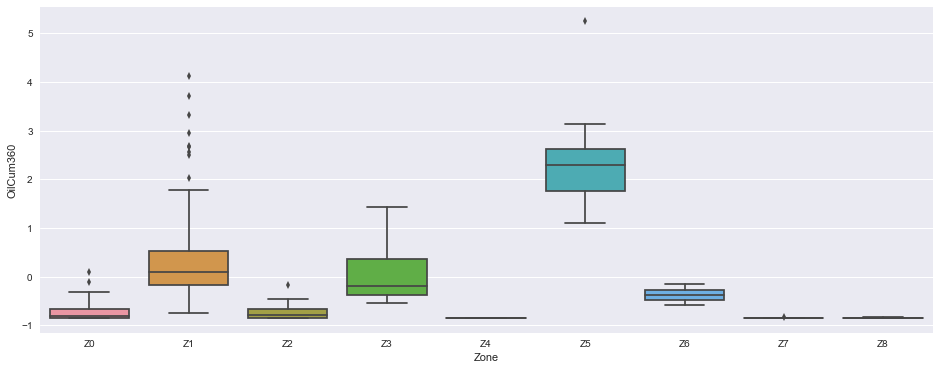

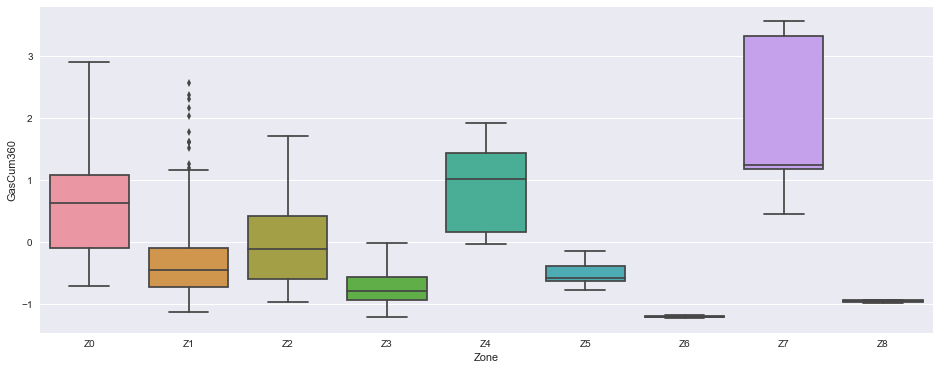

In [341]:
plt.figure(figsize = (16, 6))
sns.boxplot(x='Zone', y='OilCum360', data=dfSep,whis=2)

plt.figure(figsize = (16, 6))
sns.boxplot(x='Zone', y='GasCum360', data=dfSep,whis=2)

This can help us to detect Zones of gas/Oil

# Pressure_PPLS (PSI)

In [342]:
#MV
dfSep["Pressure_PPLS (PSI)"].isnull().sum()

2

In [343]:
missing= np.isnan(dfSep["Pressure_PPLS (PSI)"])
dfSep.loc[dfSep["Pressure_PPLS (PSI)"].isnull(), ["API","Pressure_PPLS (PSI)","Zone"]]

#corr = dfSep.select_dtypes(include = ['float64', 'int64']).iloc[:,1:].corr()
#corr["Pressure_PPLS (PSI)"].sort_values(axis=0,ascending=False).iloc[1:]

,API,Pressure_PPLS (PSI),Zone
175,24,NaN,Z4
311,110,NaN,Z7


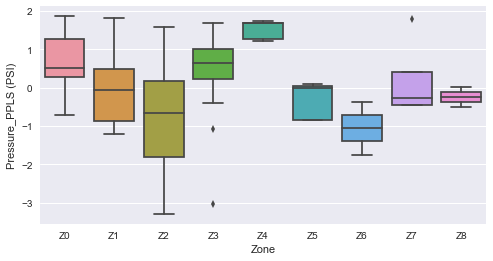

In [344]:
sns.boxplot(x='Zone', y='Pressure_PPLS (PSI)', data=dfSep,whis=1.5)

An idea that would be good is to affect to missing values the mean the variable in the zone of the well

In [345]:
w24=np.mean(dfSep[dfSep["Zone"]=="Z4"][~missing]['Pressure_PPLS (PSI)'])
w110=np.mean(dfSep[dfSep["Zone"]=="Z7"][~missing]['Pressure_PPLS (PSI)'])

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


In [346]:
dfSep.loc[missing,"Pressure_PPLS (PSI)"]=w24,w110

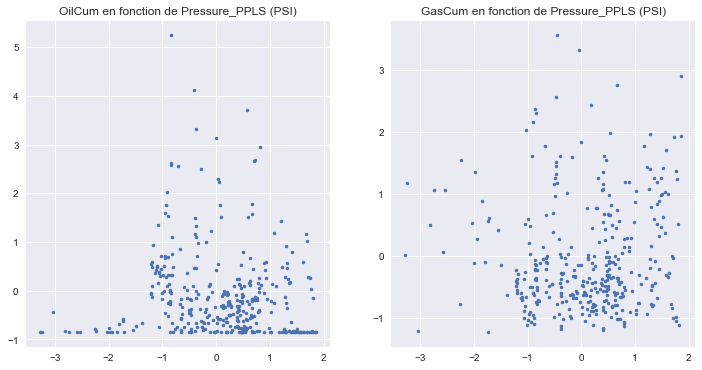

In [347]:
f, (ax1, ax2) = plt.subplots(1,2,figsize=(12,6))
ax1.plot(dfSep["Pressure_PPLS (PSI)"], dfSep.OilCum360,'.')
ax1.set_title("OilCum en fonction de Pressure_PPLS (PSI)")
ax2.plot(dfSep["Pressure_PPLS (PSI)"], dfSep.GasCum360,'.')
ax2.set_title("GasCum en fonction de Pressure_PPLS (PSI)")

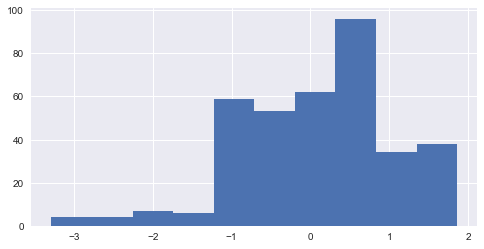

In [348]:
# Check distribution of Lateral_Length:
plt.rcParams['figure.figsize'] = (8.0,4.0)
(dfSep["Pressure_PPLS (PSI)"]).hist()

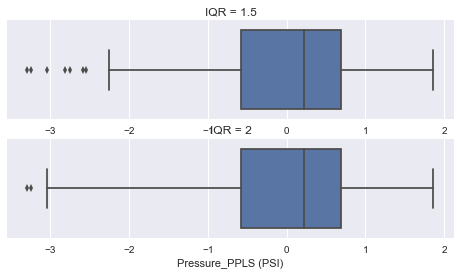

In [349]:
plt.figure(figsize = (16, 6))
f, (ax1, ax2) = plt.subplots(2)
sns.boxplot(dfSep["Pressure_PPLS (PSI)"],whis=1.5,ax=ax1)
ax1.set_title('IQR = 1.5')
sns.boxplot(dfSep["Pressure_PPLS (PSI)"],whis=2,ax=ax2)
ax2.set_title('IQR = 2')

This is same case as Lateral length variable, outliers very close to each other, i suggest not to change the values 

# TOC_PPLS (%)

In [350]:
#MV
dfSep["TOC_PPLS (%)"].isnull().sum()

0

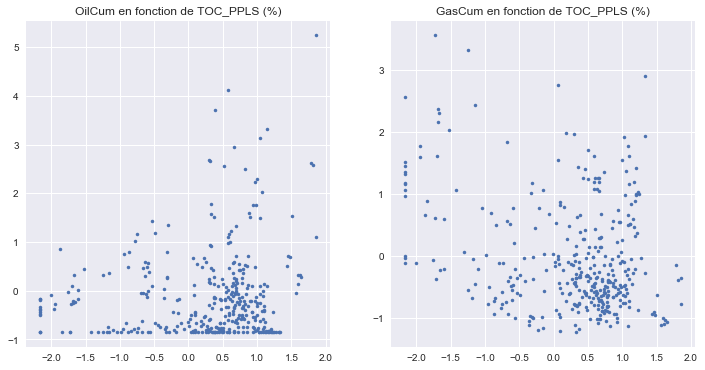

In [351]:
f, (ax1, ax2) = plt.subplots(1,2,figsize=(12,6))
ax1.plot(dfSep["TOC_PPLS (%)"], dfSep.OilCum360,'.')
ax1.set_title("OilCum en fonction de TOC_PPLS (%)")
ax2.plot(dfSep["TOC_PPLS (%)"], dfSep.GasCum360,'.')
ax2.set_title("GasCum en fonction de TOC_PPLS (%)")

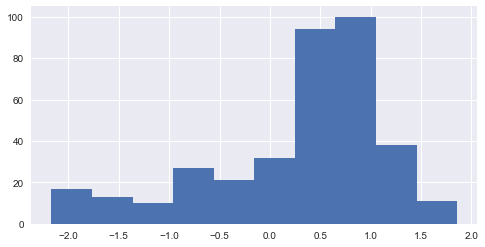

In [352]:
# Check distribution of Lateral_Length:
plt.rcParams['figure.figsize'] = (8.0,4.0)
(dfSep["TOC_PPLS (%)"]).hist()

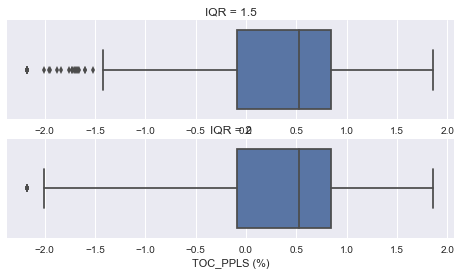

In [353]:
plt.figure(figsize = (16, 6))
f, (ax1, ax2) = plt.subplots(2)
sns.boxplot(dfSep["TOC_PPLS (%)"],whis=1.5,ax=ax1)
ax1.set_title('IQR = 1.5')
sns.boxplot(dfSep["TOC_PPLS (%)"],whis=2.2,ax=ax2)
ax2.set_title('IQR = 2')

We can notice a group of extreme values (<2) ( we can see them using IQR of 2.1)

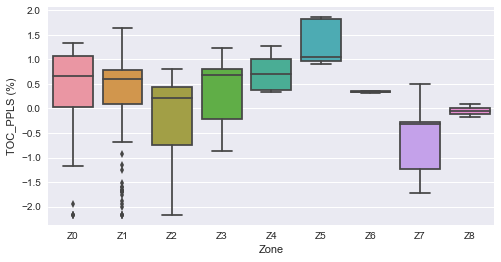

In [354]:
sns.boxplot(x='Zone', y='TOC_PPLS (%)', data=dfSep,whis=1.5)

In [355]:
o2=outliers(dfSep,"TOC_PPLS (%)",2.3)
o2.loc[:,["TOC_PPLS (%)","Zone"]]


,TOC_PPLS (%),Zone
35,-2.169983,Z0
150,-2.169983,Z1
155,-2.169983,Z1
163,-2.169983,Z2
174,-2.169983,Z1
195,-2.169983,Z0
227,-2.169983,Z1
247,-2.169983,Z0
270,-2.169983,Z1
310,-2.001402,Z1


We can affect to outliers  the mean of the variable for wells in Z1,Z2,Z0

In [356]:
dfSep.loc[o2.index,"TOC_PPLS (%)"]=np.mean(dfSep[(dfSep.Zone =="Z0") | (dfSep.Zone == "Z1")| (dfSep.Zone == "Z2")]["TOC_PPLS (%)"])

# Frac_Gradient (PSI/ft)

In [357]:
#MV
dfSep["Frac_Gradient (PSI/ft)"].isnull().sum()

8

In [358]:
missing= np.isnan(dfSep["Frac_Gradient (PSI/ft)"])
dfSep.loc[dfSep["Frac_Gradient (PSI/ft)"].isnull(), ["API","Frac_Gradient (PSI/ft)"]]
print(np.mean(dfSep["Frac_Gradient (PSI/ft)"]))


0.019048055291830963


We can notice from the distibution that all values are close to 0, so we replace missing values to the mean

In [359]:
dfSep.loc[missing,"Frac_Gradient (PSI/ft)"]=np.mean(dfSep["Frac_Gradient (PSI/ft)"])

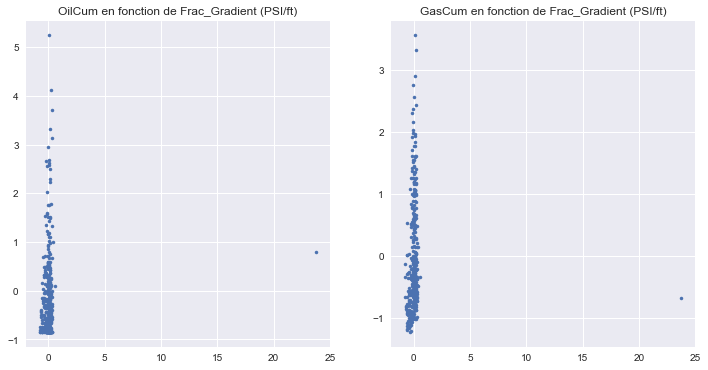

In [360]:
f, (ax1, ax2) = plt.subplots(1,2,figsize=(12,6))
ax1.plot(dfSep["Frac_Gradient (PSI/ft)"], dfSep.OilCum360,'.')
ax1.set_title("OilCum en fonction de Frac_Gradient (PSI/ft)")
ax2.plot(dfSep["Frac_Gradient (PSI/ft)"], dfSep.GasCum360,'.')
ax2.set_title("GasCum en fonction de Frac_Gradient (PSI/ft)")

there an extreme value at API=746, we just affect the mean of the variable to it 

In [361]:
ind=dfSep[dfSep.API==746].index
dfSep.loc[ind,"Frac_Gradient (PSI/ft)"]=np.mean(dfSep["Frac_Gradient (PSI/ft)"])

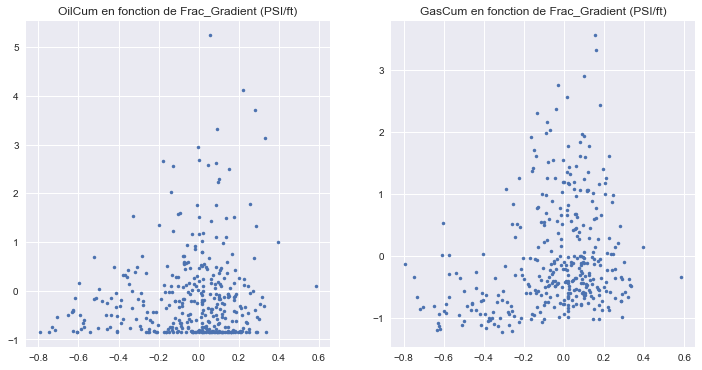

In [362]:
f, (ax1, ax2) = plt.subplots(1,2,figsize=(12,6))
ax1.plot(dfSep["Frac_Gradient (PSI/ft)"], dfSep.OilCum360,'.')
ax1.set_title("OilCum en fonction de Frac_Gradient (PSI/ft)")
ax2.plot(dfSep["Frac_Gradient (PSI/ft)"], dfSep.GasCum360,'.')
ax2.set_title("GasCum en fonction de Frac_Gradient (PSI/ft)")

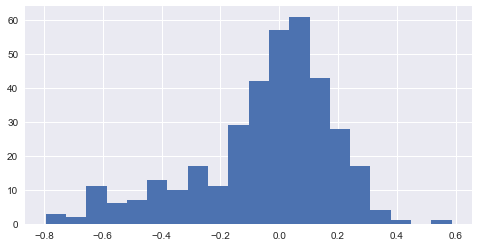

In [363]:
# Check distribution of Lateral_Length:
plt.rcParams['figure.figsize'] = (8.0,4.0)
(dfSep["Frac_Gradient (PSI/ft)"]).hist(bins=20)

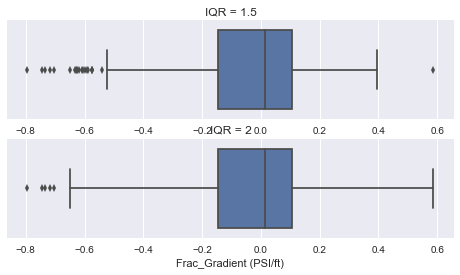

In [364]:
plt.figure(figsize = (16, 6))
f, (ax1, ax2) = plt.subplots(2)
sns.boxplot(dfSep["Frac_Gradient (PSI/ft)"],whis=1.5,ax=ax1)
ax1.set_title('IQR = 1.5')
sns.boxplot(dfSep["Frac_Gradient (PSI/ft)"],whis=2,ax=ax2)
ax2.set_title('IQR = 2')

In [365]:
o3=outliers(dfSep,"Frac_Gradient (PSI/ft)",2)
o3[["API","Frac_Gradient (PSI/ft)"]]

,API,Frac_Gradient (PSI/ft)
92,174,-0.746216
103,82,-0.705038
198,249,-0.649953
241,585,-0.718609
299,528,-0.794076
318,238,-0.734230


We replace outliers by mean

In [366]:
replace_by_mean(dfSep,"Frac_Gradient (PSI/ft)",o3)

# Vcarb_PPLS    Vsand_PPLS    Vclay_PPLS

In [367]:
print(len(dfSep["Vcarb_PPLS"].unique()))
print(len(dfSep["Vsand_PPLS"].unique()))
print(len(dfSep["Vclay_PPLS"].unique()))

34
29
16


As we see here we have some kind of steps for the 3 variables

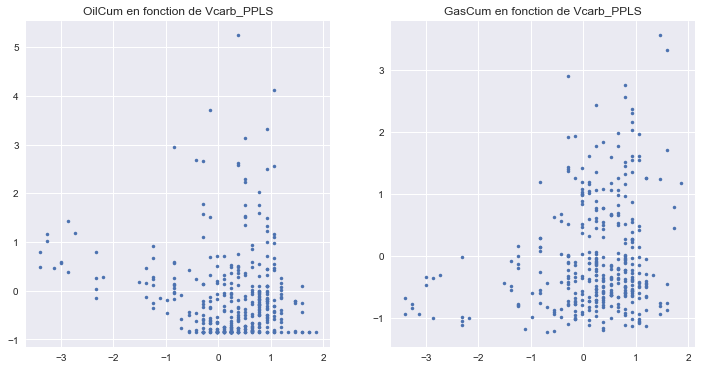

In [368]:
f, (ax1, ax2) = plt.subplots(1,2,figsize=(12,6))
ax1.plot(dfSep["Vcarb_PPLS"], dfSep.OilCum360,'.')
ax1.set_title("OilCum en fonction de Vcarb_PPLS")
ax2.plot(dfSep["Vcarb_PPLS"], dfSep.GasCum360,'.')
ax2.set_title("GasCum en fonction de Vcarb_PPLS")

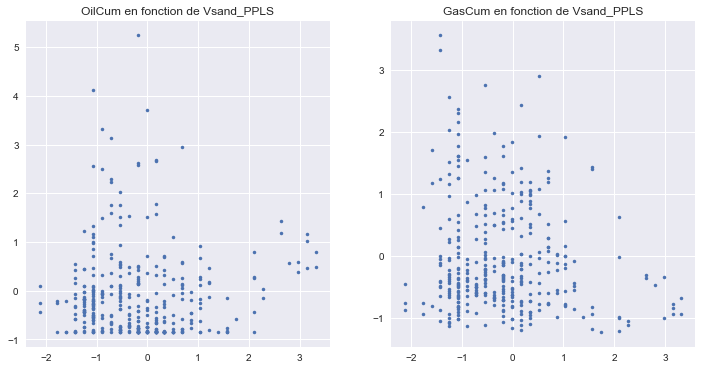

In [369]:
f, (ax1, ax2) = plt.subplots(1,2,figsize=(12,6))
ax1.plot(dfSep["Vsand_PPLS"], dfSep.OilCum360,'.')
ax1.set_title("OilCum en fonction de Vsand_PPLS")
ax2.plot(dfSep["Vsand_PPLS"], dfSep.GasCum360,'.')
ax2.set_title("GasCum en fonction de Vsand_PPLS")

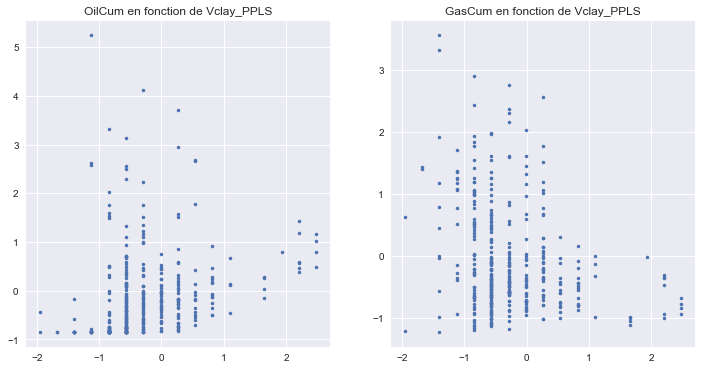

In [370]:
f, (ax1, ax2) = plt.subplots(1,2,figsize=(12,6))
ax1.plot(dfSep["Vclay_PPLS"], dfSep.OilCum360,'.')
ax1.set_title("OilCum en fonction de Vclay_PPLS")
ax2.plot(dfSep["Vclay_PPLS"], dfSep.GasCum360,'.')
ax2.set_title("GasCum en fonction de Vclay_PPLS")

(array([   4.,   26.,   61.,  153.,   71.,   15.,   18.,    0.,    5.,   10.]),
 array([-1.95779936, -1.51358337, -1.06936738, -0.62515138, -0.18093539,
         0.2632806 ,  0.70749659,  1.15171259,  1.59592858,  2.04014457,
         2.48436056]),
 <a list of 10 Patch objects>)

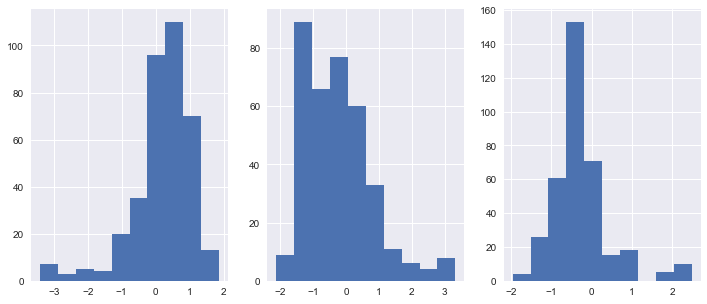

In [371]:
# Check distribution of volumes:
f, (ax1, ax2,ax3) = plt.subplots(1,3,figsize=(12,5))
ax1.hist(dfSep["Vcarb_PPLS"])
ax2.hist(dfSep["Vsand_PPLS"])
ax3.hist(dfSep["Vclay_PPLS"])

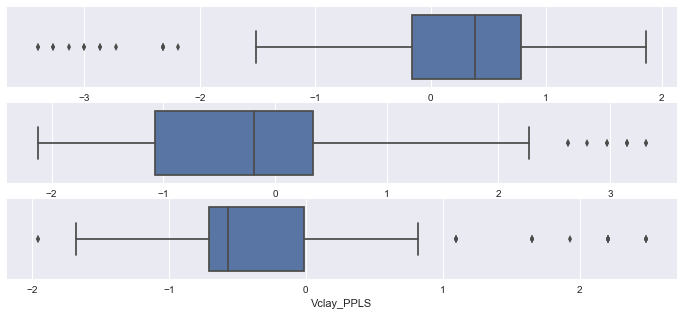

In [372]:
plt.figure(figsize = (16, 6))
f, (ax1, ax2,ax3) = plt.subplots(3,1,figsize=(12,5))
sns.boxplot(dfSep["Vcarb_PPLS"],whis=1.5,ax=ax1)
sns.boxplot(dfSep["Vsand_PPLS"],whis=1.5,ax=ax2)
sns.boxplot(dfSep["Vclay_PPLS"],whis=1.5,ax=ax3)

As the variables are taking a fixed number of values, dealing with outliers can biase results because we ll have to change those steps which would be the same in test 

# PR_PPLS

In [373]:
print(len(dfSep["PR_PPLS"].unique()))

11


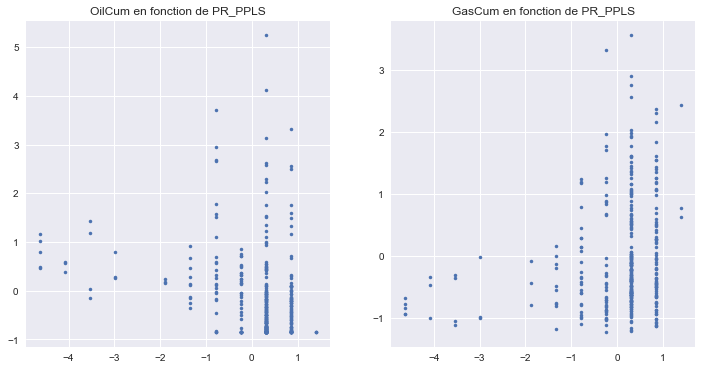

In [374]:
f, (ax1, ax2) = plt.subplots(1,2,figsize=(12,6))
ax1.plot(dfSep["PR_PPLS"], dfSep.OilCum360,'.')
ax1.set_title("OilCum en fonction de PR_PPLS")
ax2.plot(dfSep["PR_PPLS"], dfSep.GasCum360,'.')
ax2.set_title("GasCum en fonction de PR_PPLS")

We can notice that there are some extreme values (step =-1), we moved from -1,9 to -3

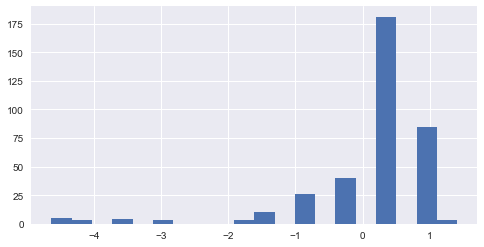

In [375]:
# Check distribution of Lateral_Length:
plt.rcParams['figure.figsize'] = (8.0,4.0)
(dfSep["PR_PPLS"]).hist(bins=20)

In [376]:
dfSep[dfSep.PR_PPLS<=-3].PR_PPLS

42    -4.633336
101   -3.534745
128   -4.633336
134   -3.534745
161   -4.084041
200   -4.084041
211   -3.534745
246   -3.534745
248   -4.633336
252   -4.633336
293   -4.084041
344   -4.633336
Name: PR_PPLS, dtype: float64

# YM_PPLS (PSI)

In [377]:
print(len(dfSep["YM_PPLS (PSI)"].unique()))

363


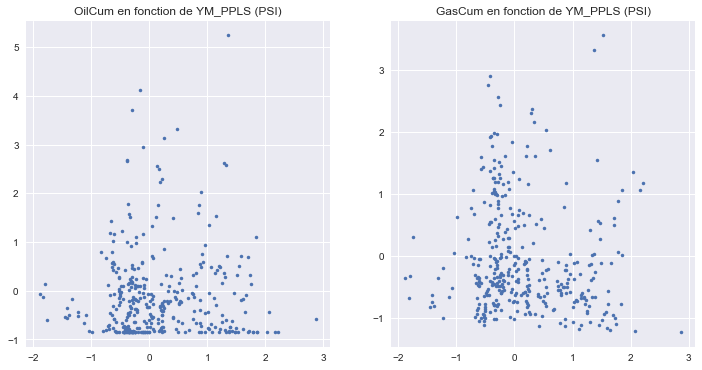

In [378]:
f, (ax1, ax2) = plt.subplots(1,2,figsize=(12,6))
ax1.plot(dfSep["YM_PPLS (PSI)"], dfSep.OilCum360,'.')
ax1.set_title("OilCum en fonction de YM_PPLS (PSI)")
ax2.plot(dfSep["YM_PPLS (PSI)"], dfSep.GasCum360,'.')
ax2.set_title("GasCum en fonction de YM_PPLS (PSI)")

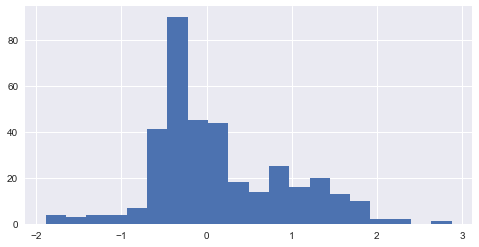

In [379]:
# Check distribution of Lateral_Length:
plt.rcParams['figure.figsize'] = (8.0,4.0)
(dfSep["YM_PPLS (PSI)"]).hist(bins=20)

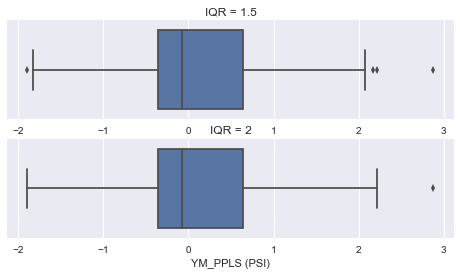

In [380]:
plt.figure(figsize = (16, 6))
f, (ax1, ax2) = plt.subplots(2)
sns.boxplot(dfSep["YM_PPLS (PSI)"],whis=1.5,ax=ax1)
ax1.set_title('IQR = 1.5')
sns.boxplot(dfSep["YM_PPLS (PSI)"],whis=2,ax=ax2)
ax2.set_title('IQR = 2')

In [381]:
o4=outliers(dfSep,"YM_PPLS (PSI)",2)
o4[["API","YM_PPLS (PSI)"]]

,API,YM_PPLS (PSI)
192,502,2.876202


In [382]:
replace_by_mean(dfSep,"YM_PPLS (PSI)",o4)

# RHOB_PPLS (g/cc)

In [383]:
print(len(dfSep["RHOB_PPLS (g/cc)"].unique()))

55


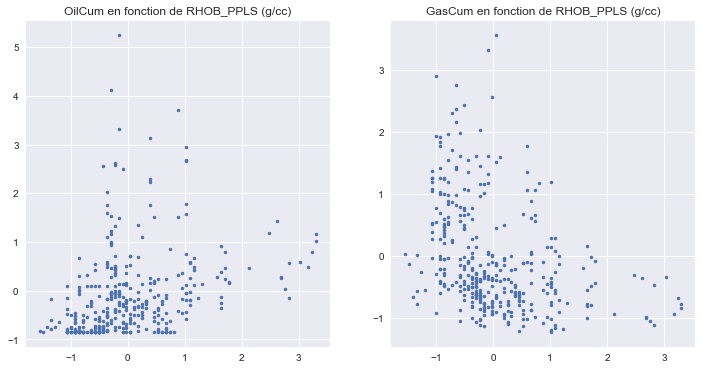

In [384]:
f, (ax1, ax2) = plt.subplots(1,2,figsize=(12,6))
ax1.plot(dfSep["RHOB_PPLS (g/cc)"], dfSep.OilCum360,'.')
ax1.set_title("OilCum en fonction de RHOB_PPLS (g/cc)")
ax2.plot(dfSep["RHOB_PPLS (g/cc)"], dfSep.GasCum360,'.')
ax2.set_title("GasCum en fonction de RHOB_PPLS (g/cc)")

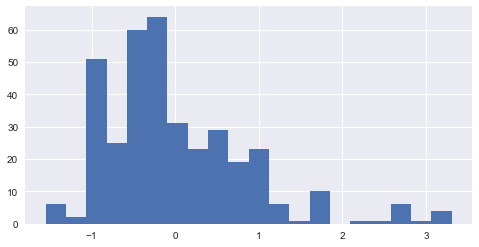

In [385]:
# Check distribution of Lateral_Length:
plt.rcParams['figure.figsize'] = (8.0,4.0)
(dfSep["RHOB_PPLS (g/cc)"]).hist(bins=20)

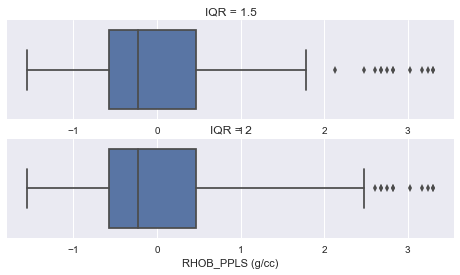

In [386]:
plt.figure(figsize = (16, 6))
f, (ax1, ax2) = plt.subplots(2)
sns.boxplot(dfSep["RHOB_PPLS (g/cc)"],whis=1.5,ax=ax1)
ax1.set_title('IQR = 1.5')
sns.boxplot(dfSep["RHOB_PPLS (g/cc)"],whis=2,ax=ax2)
ax2.set_title('IQR = 2')

we can notice that we have a group of extreme values (>2) , but the same problem for volumes, if we change the data to other values we can change the values used for the steps

# Res_PPLS (Ohmm)

In [387]:
print(len(dfSep["Res_PPLS (Ohmm)"].unique()))

362


This is not like the previous variable and volumes

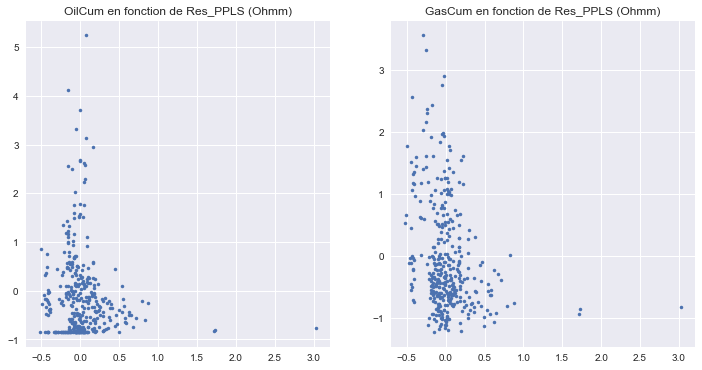

In [388]:
f, (ax1, ax2) = plt.subplots(1,2,figsize=(12,6))
ax1.plot(dfSep["Res_PPLS (Ohmm)"], dfSep.OilCum360,'.')
ax1.set_title("OilCum en fonction de Res_PPLS (Ohmm)")
ax2.plot(dfSep["Res_PPLS (Ohmm)"], dfSep.GasCum360,'.')
ax2.set_title("GasCum en fonction de Res_PPLS (Ohmm)")

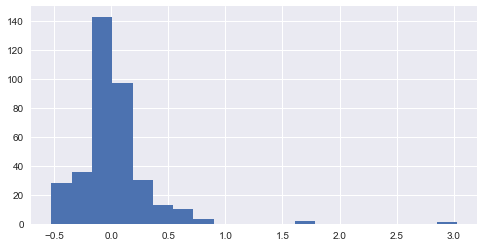

In [389]:
# Check distribution of Lateral_Length:
plt.rcParams['figure.figsize'] = (8.0,4.0)
(dfSep["Res_PPLS (Ohmm)"]).hist(bins=20)

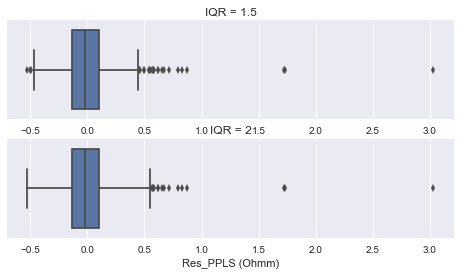

In [390]:
plt.figure(figsize = (16, 6))
f, (ax1, ax2) = plt.subplots(2)
sns.boxplot(dfSep["Res_PPLS (Ohmm)"],whis=1.5,ax=ax1)
ax1.set_title('IQR = 1.5')
sns.boxplot(dfSep["Res_PPLS (Ohmm)"],whis=2,ax=ax2)
ax2.set_title('IQR = 2')

We have two very extreme values  that we replace by mean

In [391]:
ind=dfSep[dfSep["Res_PPLS (Ohmm)"]>1].index

In [392]:
dfSep.loc[ind,"Res_PPLS (Ohmm)"]=np.mean(dfSep["Res_PPLS (Ohmm)"])

In [393]:
print(dfSep.groupby("Zone")["Res_PPLS (Ohmm)"].mean())

Zone
Z0   -0.017438
Z1   -0.071779
Z2    0.066343
Z3    0.213112
Z4   -0.276214
Z5    0.060346
Z6   -0.119289
Z7   -0.274515
Z8    0.256118
Name: Res_PPLS (Ohmm), dtype: float64


# GR_PPLS (API)

In [394]:
print(len(dfSep["GR_PPLS (API)"].unique()))

315


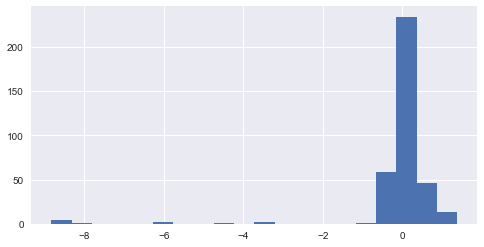

In [395]:
# Check distribution of Lateral_Length:
plt.rcParams['figure.figsize'] = (8.0,4.0)
(dfSep["GR_PPLS (API)"]).hist(bins=20)

We can see that there are many outliers and extreme values that should be replaced

In [396]:
ind=dfSep[dfSep["GR_PPLS (API)"]<-2].index

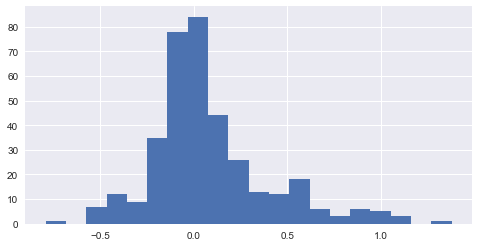

In [397]:
dfSep.loc[ind,"GR_PPLS (API)"]=np.mean(dfSep["GR_PPLS (API)"])
(dfSep["GR_PPLS (API)"]).hist(bins=20)

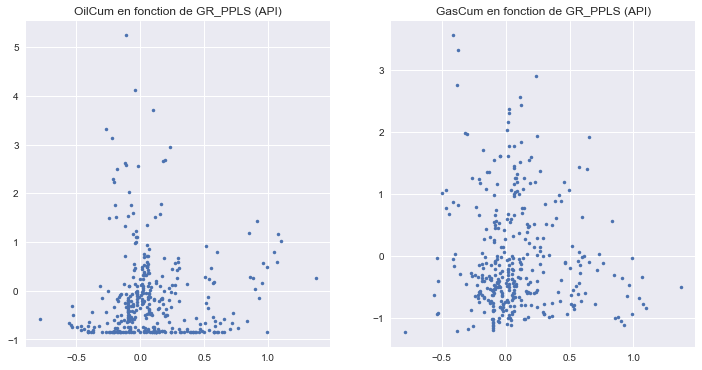

In [398]:
f, (ax1, ax2) = plt.subplots(1,2,figsize=(12,6))
ax1.plot(dfSep["GR_PPLS (API)"], dfSep.OilCum360,'.')
ax1.set_title("OilCum en fonction de GR_PPLS (API)")
ax2.plot(dfSep["GR_PPLS (API)"], dfSep.GasCum360,'.')
ax2.set_title("GasCum en fonction de GR_PPLS (API)")

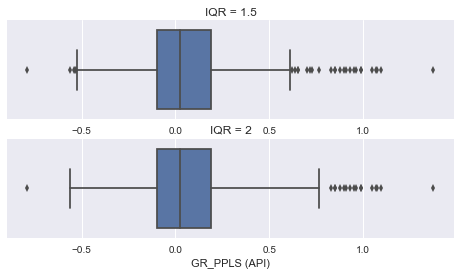

In [399]:
plt.figure(figsize = (16, 6))
f, (ax1, ax2) = plt.subplots(2)
sns.boxplot(dfSep["GR_PPLS (API)"],whis=1.5,ax=ax1)
ax1.set_title('IQR = 1.5')
sns.boxplot(dfSep["GR_PPLS (API)"],whis=2,ax=ax2)
ax2.set_title('IQR = 2')

Let's replace the two extreme values but before let's see if there are dissimilarities between the zones

In [400]:
print(dfSep.groupby("Zone")["GR_PPLS (API)"].mean())

Zone
Z0   -0.044845
Z1    0.082494
Z2    0.223769
Z3    0.195101
Z4    0.677028
Z5   -0.156090
Z6   -0.543284
Z7   -0.251579
Z8    0.410207
Name: GR_PPLS (API), dtype: float64


In [401]:
o=outliers(dfSep,'GR_PPLS (API)',1.5)
ind1=o[o['GR_PPLS (API)']>1.3][['GR_PPLS (API)','Zone']].index
print(o[o['GR_PPLS (API)']>1.3][['GR_PPLS (API)','Zone']])
ind2=o[o['GR_PPLS (API)']<0.7][['GR_PPLS (API)','Zone']].index
print(o[o['GR_PPLS (API)']<-0.7][['GR_PPLS (API)','Zone']])

     GR_PPLS (API) Zone
291        1.37547   Z3
     GR_PPLS (API) Zone
192      -0.788966   Z6


In [402]:
dfSep.loc[ind1,'GR_PPLS (API)']=dfSep.groupby("Zone")["GR_PPLS (API)"].mean()[3]
dfSep.loc[ind2,'GR_PPLS (API)']=dfSep.groupby("Zone")["GR_PPLS (API)"].mean()[6]

# DT_PPLS (us/ft)

In [403]:
print(len(dfSep["DT_PPLS (us/ft)"].unique()))

268


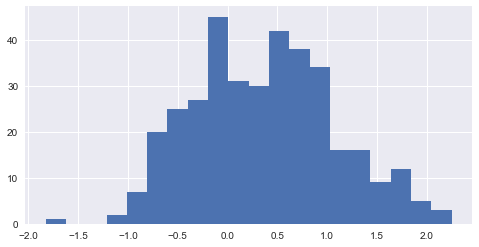

In [404]:
# Check distribution of Lateral_Length:
plt.rcParams['figure.figsize'] = (8.0,4.0)
(dfSep["DT_PPLS (us/ft)"]).hist(bins=20)

we can notice an extreme value <-1.5

In [405]:
ind=dfSep[dfSep["DT_PPLS (us/ft)"]<-1.5].index
print(dfSep[dfSep["DT_PPLS (us/ft)"]<-1.5][['DT_PPLS (us/ft)','Zone']])
dfSep.loc[ind,'DT_PPLS (us/ft)']=dfSep.groupby("Zone")["DT_PPLS (us/ft)"].mean()[1]


     DT_PPLS (us/ft) Zone
310        -1.826732   Z1


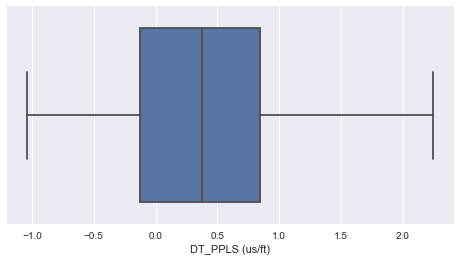

In [406]:
sns.boxplot(dfSep["DT_PPLS (us/ft)"],whis=1.5)
ax1.set_title('IQR = 1.5')

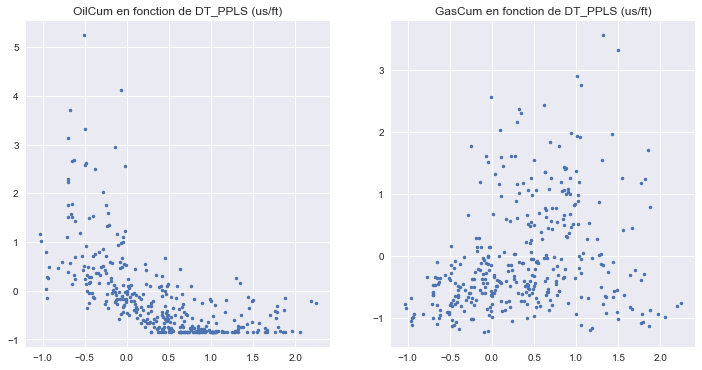

In [407]:
f, (ax1, ax2) = plt.subplots(1,2,figsize=(12,6))
ax1.plot(dfSep["DT_PPLS (us/ft)"], dfSep.OilCum360,'.')
ax1.set_title("OilCum en fonction de DT_PPLS (us/ft)")
ax2.plot(dfSep["DT_PPLS (us/ft)"], dfSep.GasCum360,'.')
ax2.set_title("GasCum en fonction de DT_PPLS (us/ft)")

# DTs_PPLS (us/ft)

In [408]:
print(len(dfSep["DTs_PPLS (us/ft)"].unique()))

346


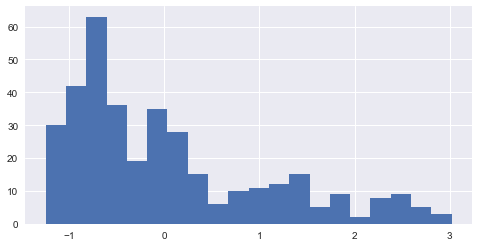

In [409]:
# Check distribution of Lateral_Length:
plt.rcParams['figure.figsize'] = (8.0,4.0)
(dfSep["DTs_PPLS (us/ft)"]).hist(bins=20)

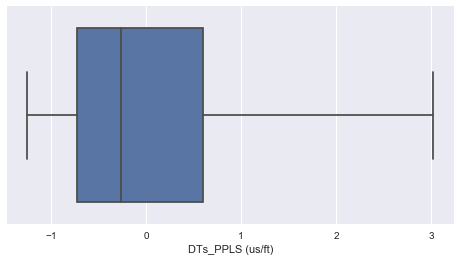

In [410]:
sns.boxplot(dfSep["DTs_PPLS (us/ft)"],whis=2)

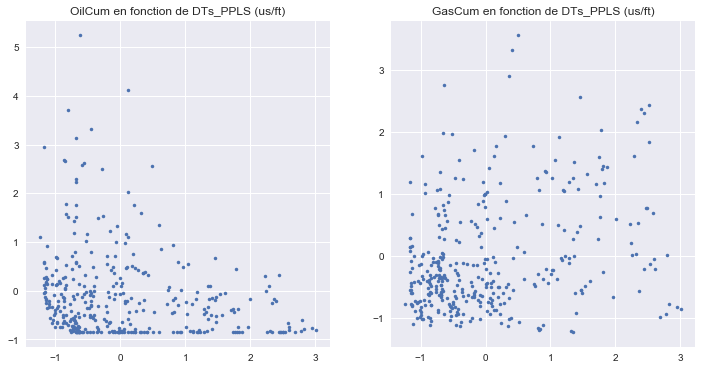

In [411]:
f, (ax1, ax2) = plt.subplots(1,2,figsize=(12,6))
ax1.plot(dfSep["DTs_PPLS (us/ft)"], dfSep.OilCum360,'.')
ax1.set_title("OilCum en fonction de DTs_PPLS (us/ft)")
ax2.plot(dfSep["DTs_PPLS (us/ft)"], dfSep.GasCum360,'.')
ax2.set_title("GasCum en fonction de DTs_PPLS (us/ft)")

# Nbr_Stages

In [412]:
print(len(dfSep["Nbr_Stages"].unique()))

53


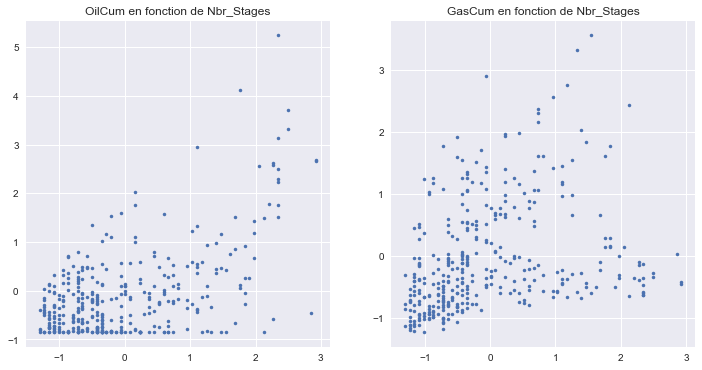

In [413]:
f, (ax1, ax2) = plt.subplots(1,2,figsize=(12,6))
ax1.plot(dfSep["Nbr_Stages"], dfSep.OilCum360,'.')
ax1.set_title("OilCum en fonction de Nbr_Stages")
ax2.plot(dfSep["Nbr_Stages"], dfSep.GasCum360,'.')
ax2.set_title("GasCum en fonction de Nbr_Stages")

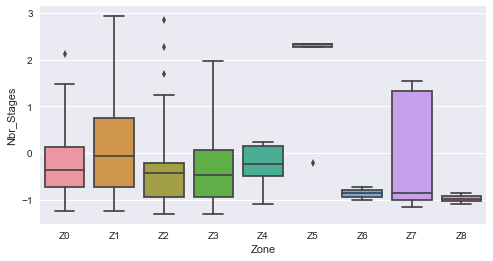

In [414]:
sns.boxplot(x="Zone",y="Nbr_Stages",data=dfSep,whis=2)

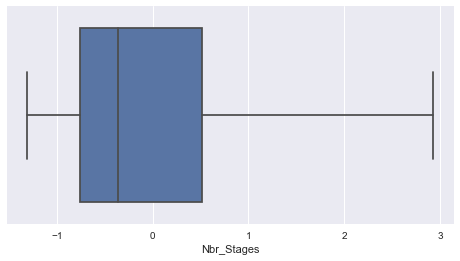

In [415]:
sns.boxplot(dfSep["Nbr_Stages"],whis=2)

# Proppant_Designed (kg) 

In [416]:
print(len(dfSep["Proppant_Designed (kg)"].unique()))

263


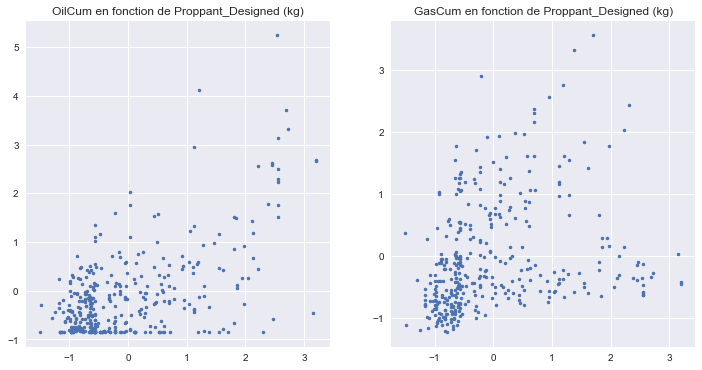

In [417]:
f, (ax1, ax2) = plt.subplots(1,2,figsize=(12,6))
ax1.plot(dfSep["Proppant_Designed (kg)"], dfSep.OilCum360,'.')
ax1.set_title("OilCum en fonction de Proppant_Designed (kg)")
ax2.plot(dfSep["Proppant_Designed (kg)"], dfSep.GasCum360,'.')
ax2.set_title("GasCum en fonction de Proppant_Designed (kg)")

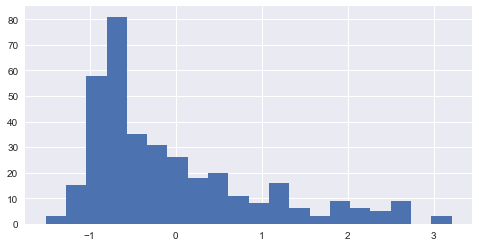

In [418]:
# Check distribution of Lateral_Length:
plt.rcParams['figure.figsize'] = (8.0,4.0)
(dfSep["Proppant_Designed (kg)"]).hist(bins=20)

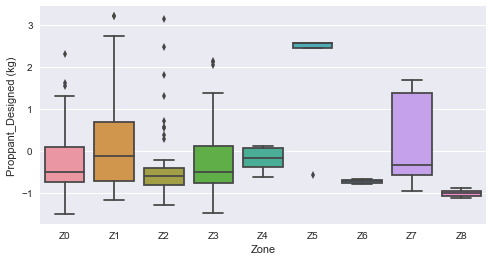

In [419]:
sns.boxplot(x="Zone",y="Proppant_Designed (kg)",data=dfSep,whis=1.5)

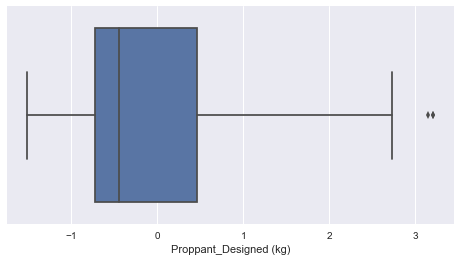

In [420]:
sns.boxplot(dfSep["Proppant_Designed (kg)"],whis=2)

There are outliers (values >3)

In [421]:
o6=outliers(dfSep,"Proppant_Designed (kg)",2)
o6[["Proppant_Designed (kg)","Zone"]]

,Proppant_Designed (kg),Zone
132,3.209552,Z1
285,3.204600,Z1
359,3.149993,Z2


There are different means by region (zone) so we ll have to replace outliers by mean

In [422]:
dfSep.loc[[132,285],"Proppant_Designed (kg)"]= np.mean(dfSep[dfSep.Zone=="Z1"]["Proppant_Designed (kg)"])
dfSep.loc[359,"Proppant_Designed (kg)"]= np.mean(dfSep[dfSep.Zone=="Z2"]["Proppant_Designed (kg)"])

# Proppant_in_Formation (kg)

In [423]:
print(len(dfSep["Proppant_in_Formation (kg)"].unique()))

363


In [424]:
#There is one missing value
miss=np.isnan(dfSep["Proppant_in_Formation (kg)"])
mv["Proppant_in_Formation (kg)"]

1

In [425]:
dfSep.corr()["Proppant_in_Formation (kg)"].sort_values(ascending=False)

Proppant_in_Formation (kg)      1.000000
Proppant_Designed (kg)          0.955090
Nbr_Stages                      0.946389
Proppant_per_ft (kg/ft)         0.800035
Lateral_Length (ft)             0.759211
OilCum360                       0.566545
ShutInPressure_Initial (KPa)    0.452710
ShutInPressure_Fil (KPa)        0.414423
Shot_Density (shots/ft)         0.335665
Frac_Gradient (PSI/ft)          0.319316
GasCum360                       0.283659
ISIP (KPa)                      0.271619
Erosion_PPLS (ft)               0.247468
Max_Treating_pressure (KPa)     0.229144
Avg_Treating_Pressure (KPa)     0.203278
S3_contrast_PPLS (PSI)          0.122377
Surf_Y                          0.117946
Min_Treating_Pressure (KPa)     0.111050
RHOB_PPLS (g/cc)                0.105521
deltaT_Dril_Comp                0.073045
API                             0.061300
Heat_Flow (W/m2)                0.058514
Vclay_PPLS                      0.050374
Temp_Anomaly (F)                0.040788
Vcarb_PPLS      

We can see that Proppant_in_Formation (kg) and Proppant_Designed (kg) are very correlated 0.95 
We can try a linear model to predict the missing value (Andi's function)

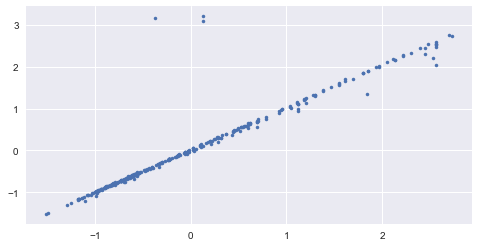

In [426]:
plt.plot(dfSep["Proppant_Designed (kg)"], dfSep["Proppant_in_Formation (kg)"],'.')

In [427]:
def lin_regr(namex,namey):
    model = linear_model.LinearRegression()
    nansx= np.array(np.isnan(df[namex]))
    nansy= np.array(np.isnan(df[namey]))
    nan=np.logical_or(nansx,nansy)
    df_nonans=df[np.logical_not(nan)]
    x=df_nonans[namex].values
    x=[e for e in x]
    x=np.array(x)
    y=df_nonans[namey].values
    y=[e for e in y]
    y=np.array(y)
    model.fit(x[:, np.newaxis], y)
    res= model.coef_
    print("we estimate y= ax+b, with a equals:"+ str(res))
    return res

In [428]:
a=lin_regr("Proppant_Designed (kg)","Proppant_in_Formation (kg)")

we estimate y= ax+b, with a equals:[ 0.99715271]


In [429]:
m1=np.mean(dfSep["Proppant_Designed (kg)"])
m2=np.mean(dfSep["Proppant_in_Formation (kg)"])
dfSep["Proppant_in_Formation (kg)"][miss]=(dfSep["Proppant_Designed (kg)"][miss]- m1)*a+ m2

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [430]:
dfSep["Proppant_in_Formation (kg)"][miss]

58   -0.697958
Name: Proppant_in_Formation (kg), dtype: float64

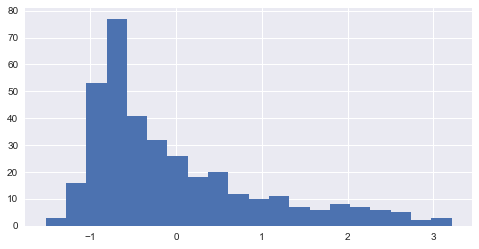

In [431]:
# Check distribution of Lateral_Length:
plt.rcParams['figure.figsize'] = (8.0,4.0)
(dfSep["Proppant_in_Formation (kg)"]).hist(bins=20)

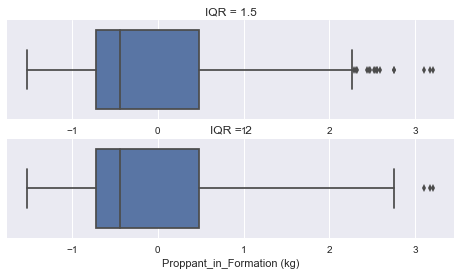

In [432]:
plt.figure(figsize = (16, 6))
f, (ax1, ax2) = plt.subplots(2)
sns.boxplot(dfSep["Proppant_in_Formation (kg)"],whis=1.5,ax=ax1)
ax1.set_title('IQR = 1.5')
sns.boxplot(dfSep["Proppant_in_Formation (kg)"],whis=2,ax=ax2)
ax2.set_title('IQR = 2')

there are some outliers

In [433]:
o7=outliers(dfSep,"Proppant_in_Formation (kg)",2)
o7[["Proppant_in_Formation (kg)","Zone"]]

,Proppant_in_Formation (kg),Zone
285,3.212776,Z1
359,3.175641,Z2


In [434]:
dfSep.loc[285,"Proppant_in_Formation (kg)"]= np.mean(dfSep[dfSep.Zone=="Z1"]["Proppant_in_Formation (kg)"])
dfSep.loc[359,"Proppant_in_Formation (kg)"]= np.mean(dfSep[dfSep.Zone=="Z2"]["Proppant_in_Formation (kg)"])

notice that there are the same outliers for the two proppant variables don't know if we have to change them or not

# Avg_Rate_Slurry (bpm)  

In [435]:
print(len(dfSep["Avg_Rate_Slurry (bpm)"].unique()))

353


In [436]:
mv["Avg_Rate_Slurry (bpm)"]

0

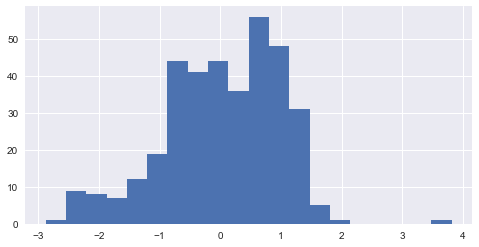

In [437]:
# Check distribution of Lateral_Length:
plt.rcParams['figure.figsize'] = (8.0,4.0)
(dfSep["Avg_Rate_Slurry (bpm)"]).hist(bins=20)

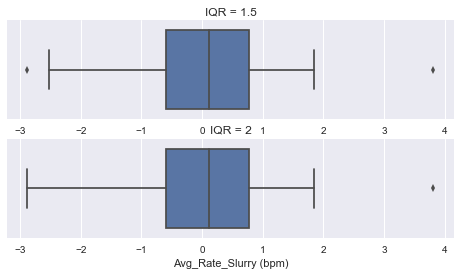

In [438]:
plt.figure(figsize = (16, 6))
f, (ax1, ax2) = plt.subplots(2)
sns.boxplot(dfSep["Avg_Rate_Slurry (bpm)"],whis=1.5,ax=ax1)
ax1.set_title('IQR = 1.5')
sns.boxplot(dfSep["Avg_Rate_Slurry (bpm)"],whis=2,ax=ax2)
ax2.set_title('IQR = 2')

there are some outliers that should be replaced 

In [439]:
o8=outliers(dfSep,"Avg_Rate_Slurry (bpm)",1.5)
o8[["Avg_Rate_Slurry (bpm)","Zone"]]

,Avg_Rate_Slurry (bpm),Zone
83,3.813211,Z3
257,-2.877936,Z5


We can see that the values of outliers are extremely far so there is no doubt there is a difference between zones 

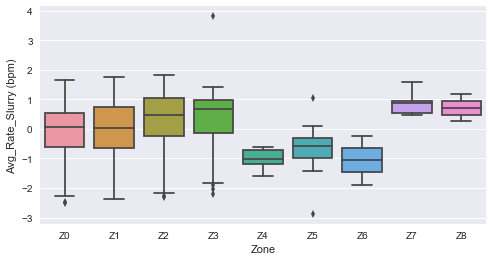

In [440]:
sns.boxplot(x="Zone",y="Avg_Rate_Slurry (bpm)",data=dfSep,whis=1.5)

In [441]:
dfSep.loc[83,"Avg_Rate_Slurry (bpm)"]= np.mean(dfSep[dfSep.Zone=="Z3"]["Avg_Rate_Slurry (bpm)"])
dfSep.loc[257,"Avg_Rate_Slurry (bpm)"]= np.mean(dfSep[dfSep.Zone=="Z5"]["Avg_Rate_Slurry (bpm)"])

# Max_Rate_Slurry (bpm)  Min_Rate_Slurry (bpm)

In [442]:
print(len(dfSep["Max_Rate_Slurry (bpm)"].unique()))

354


In [443]:
dfSep.corr()["Max_Rate_Slurry (bpm)"].sort_values(ascending=False)

Max_Rate_Slurry (bpm)           1.000000
Avg_Rate_Slurry (bpm)           0.826799
Stage_Spacing (ft)              0.373716
Depth_TVD_PPLS (ft)             0.212097
S3Tect_PPLS (PSI)               0.190364
Avg_Treating_Pressure (KPa)     0.189212
Min_Rate_Slurry (bpm)           0.177115
Max_Treating_pressure (KPa)     0.133251
RHOB_PPLS (g/cc)                0.126692
Surf_X                          0.116960
Res_PPLS (Ohmm)                 0.115606
Vsand_PPLS                      0.112487
TOC_PPLS (%)                    0.109785
S3_contrast_PPLS (PSI)          0.087933
Vclay_PPLS                      0.087286
GR_PPLS (API)                   0.042360
Shot_Density (shots/ft)         0.041849
Shot_Total                      0.026788
YM_PPLS (PSI)                   0.026643
deltaT_Comp_Prod                0.024595
Min_Treating_Pressure (KPa)     0.022204
Pressure_PPLS (PSI)             0.001558
OilCum360                       0.001064
Erosion_PPLS (ft)              -0.009854
API             

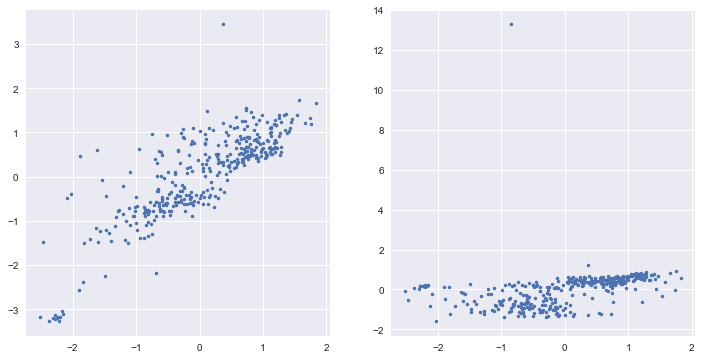

In [444]:
f, (ax1, ax2) = plt.subplots(1,2,figsize=(12,6))
ax1.plot(dfSep["Avg_Rate_Slurry (bpm)"], dfSep["Max_Rate_Slurry (bpm)"],'.')
ax2.plot(dfSep["Avg_Rate_Slurry (bpm)"], dfSep["Min_Rate_Slurry (bpm)"],'.')

In [445]:
#Missing values
miss_max=np.isnan(dfSep["Max_Rate_Slurry (bpm)"])
miss_min=np.isnan(dfSep["Min_Rate_Slurry (bpm)"])
mv["Max_Rate_Slurry (bpm)"],mv["Min_Rate_Slurry (bpm)"]

(2, 1)

we can use a linear model to predict missing values of max and min 

In [446]:
dfSep.loc[miss_max,["Avg_Rate_Slurry (bpm)","Max_Rate_Slurry (bpm)","Min_Rate_Slurry (bpm)"]]

,Avg_Rate_Slurry (bpm),Max_Rate_Slurry (bpm),Min_Rate_Slurry (bpm)
21,-0.666492,NaN,NaN
258,-2.121105,NaN,-0.807256


In [447]:
a1=lin_regr("Avg_Rate_Slurry (bpm)","Max_Rate_Slurry (bpm)")
a2=lin_regr("Avg_Rate_Slurry (bpm)","Min_Rate_Slurry (bpm)")

we estimate y= ax+b, with a equals:[ 0.87474179]
we estimate y= ax+b, with a equals:[ 0.36100708]


In [448]:
m=np.mean(dfSep["Avg_Rate_Slurry (bpm)"])
m_max=np.mean(dfSep["Max_Rate_Slurry (bpm)"])
m_min=np.mean(dfSep["Min_Rate_Slurry (bpm)"])
dfSep["Max_Rate_Slurry (bpm)"][miss_max]=(dfSep["Avg_Rate_Slurry (bpm)"][miss_max]- m)*a1+ m_max
dfSep["Min_Rate_Slurry (bpm)"][miss_min]=(dfSep["Avg_Rate_Slurry (bpm)"][miss_min]- m)*a2+ m_min


C:\Users\hp\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [449]:
dfSep.loc[miss_max,["Avg_Rate_Slurry (bpm)","Max_Rate_Slurry (bpm)","Min_Rate_Slurry (bpm)"]]

,Avg_Rate_Slurry (bpm),Max_Rate_Slurry (bpm),Min_Rate_Slurry (bpm)
21,-0.666492,-0.562773,-0.252359
258,-2.121105,-1.835184,-0.807256


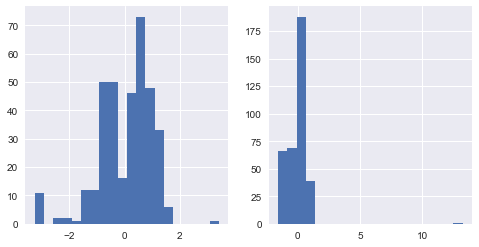

In [451]:
# Check distribution of Lateral_Length:
f, (ax1, ax2) = plt.subplots(1,2)
(dfSep["Max_Rate_Slurry (bpm)"]).hist(bins=20,ax=ax1)
(dfSep["Min_Rate_Slurry (bpm)"]).hist(bins=20,ax=ax2)


we see that there are outliers for max and min 

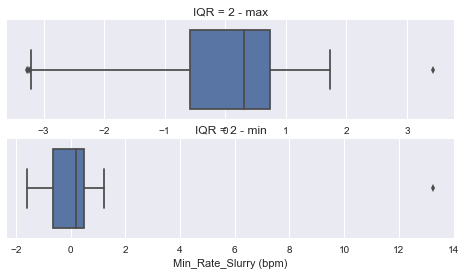

In [459]:
plt.figure(figsize = (16, 6))
f, (ax1, ax2) = plt.subplots(2)
sns.boxplot(dfSep["Max_Rate_Slurry (bpm)"],whis=2,ax=ax1)
ax1.set_title('IQR = 2 - max')
sns.boxplot(dfSep["Min_Rate_Slurry (bpm)"],whis=2,ax=ax2)
ax2.set_title('IQR = 2 - min')

In [465]:
o9=outliers(dfSep,"Max_Rate_Slurry (bpm)",2)
o10=outliers(dfSep,"Min_Rate_Slurry (bpm)",2)

In [467]:
print(o9[["Max_Rate_Slurry (bpm)","Zone"]])
print(o10[["Min_Rate_Slurry (bpm)","Zone"]])

     Max_Rate_Slurry (bpm) Zone
217               -3.26499   Z1
     Min_Rate_Slurry (bpm) Zone
302              13.261381   Z5


In [468]:
dfSep.loc[217,"Max_Rate_Slurry (bpm)"]= np.mean(dfSep[dfSep.Zone=="Z1"]["Max_Rate_Slurry (bpm)"])
dfSep.loc[302,"Min_Rate_Slurry (bpm)"]= np.mean(dfSep[dfSep.Zone=="Z5"]["Min_Rate_Slurry (bpm)"])